In [0]:
import os
import pandas as pd
import numpy as np
import timeit
import ujson
#Usamos ujson que parece que es el que hace la importación más rápida. Añadir la documentación donde se comenta.
#from google.colab import drive  #Lo pongo más abajo, porque si no me da error (por qué??!!)

#Para conocer el uso de la memoria
import os 
import psutil

In [2]:
!ls -lh

total 4.0K
drwxr-xr-x 2 root root 4.0K Nov  7 20:08 sample_data


##ACCESO A MI DRIVE

In [3]:
#Esto me va a permitir tener acceso a las carpetas de mi drive desde Colab:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/" -lh

total 3.2G
drwx------ 2 root root 4.0K Jul 14 07:08  20180714_Deep_Learning
-rw------- 1 root root  76K Oct 22 18:13  6885.json
drwx------ 2 root root 4.0K Jun 26  2016 'avast! Files (XT1068, UWbYzWPVmAmwlrlD)'
-rw------- 1 root root 2.7M Oct 28 21:03  Cast_Crew_ids.csv
drwx------ 2 root root 4.0K Jul 18 18:38 'Colab Notebooks'
-rw------- 1 root root  44K Feb  4  2018  contacts.vcf
-rw------- 1 root root    1 Apr  9  2018  facturaIVA.gsheet
-rw------- 1 root root  50K Nov  9 13:01  genres.xlsx
-rw------- 1 root root 1.5M Oct 24 17:34  IMDB_5000_movie.csv
-rw------- 1 root root  12K Nov  3 10:33  InflationConverter.xlsx
-rw------- 1 root root    1 Nov 10 10:21 'Mis cuentas.gsheet'
-rw------- 1 root root 117K Oct 28 21:04  Movies_ids.csv
-rw------- 1 root root 1.5G Oct 12 15:09  movies.zip
-rw------- 1 root root    1 Oct 20 08:40 'Nuestras Cuentas.gsheet'
-rw------- 1 root root 1.8G Oct 27 13:06  people.zip
-rw------- 1 root root 6.4K Nov  9 18:10  ProductionCountries.xlsx
-rw------- 1 r

##IMPORTACIÓN DESDE GOOGLE DRIVE

In [0]:
#Esto sólo funciona en Google Colab porque tiene una librería de Google Colab.
#Más documentación en:
#https://colab.research.google.com/notebooks/io.ipynb
#en el apartado PyDrive.
#PyDrive documentación:
#https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

In [6]:
#Lo necesitaré para importar ficheros .xlsx
!pip install xlrd

    100% |████████████████████████████████| 112kB 3.0MB/s 


In [0]:
#Estos ficheros están en mi google drive.

#movies data
file_id = '1-jrX_p1VfgMceGIj7SK_eIef8syIGsdL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("movies.zip")

#movies ids
file_id = '1-1M-smshevfKWEj5DPpxHJ6QzP82m2c7'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Movies_ids.csv")

#people data
file_id = '1UnpPTqVcghfQzj55RIoLm8pBH_Rjdl4f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("people.zip")

#people ids
file_id = '19oOa9qjMFnDv19DHmNTTJKIuGW8X5BkQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Cast_Crew_ids.csv")

#IMDB 5000 movies:
file_id = '1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("IMDB_5000_movie.csv")

#$US inflation converter:
file_id = '11Xut6okhEWdNhsOgokYtFUvNEBfYwlWx'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("InflationConverter.xlsx")

In [8]:
!ls -lh

total 3.2G
-rw-r--r-- 1 root root 2.5K Nov 11 09:09 adc.json
-rw-r--r-- 1 root root 2.7M Nov 11 09:10 Cast_Crew_ids.csv
drwx------ 3 root root 4.0K Nov 11 09:08 drive
-rw-r--r-- 1 root root 1.5M Nov 11 09:10 IMDB_5000_movie.csv
-rw-r--r-- 1 root root  12K Nov 11 09:10 InflationConverter.xlsx
-rw-r--r-- 1 root root 117K Nov 11 09:09 Movies_ids.csv
-rw-r--r-- 1 root root 1.5G Nov 11 09:09 movies.zip
-rw-r--r-- 1 root root 1.8G Nov 11 09:09 people.zip
drwxr-xr-x 2 root root 4.0K Nov  7 20:08 sample_data


In [9]:
#Da un error pero no tiene consecuencias
!mkdir themoviedb_data
!cd themoviedb_data && unzip -q ../movies.zip
!cd themoviedb_data && unzip -q ../people.zip
!ls -lh themoviedb_data

warning [../movies.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../movies.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #409792).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
warning [../people.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../people.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #1197557).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
total 45M
drwxr-xr-x 2 root root 12M Nov 

In [10]:
!ls -1 themoviedb_data/movies | wc -l

409791


In [11]:
!ls -1 themoviedb_data/people | wc -l

1197556


## IMPORTACIÓN DE LOS JSON'S DE PELÍCULAS A UN DATAFRAME

In [12]:
#Reading file and saving in df
dfMoviesIds = pd.read_csv('./Movies_ids.csv')
dfMoviesIds.tail()

,Unnamed: 0,movie_id
10851,10851,397837
10852,10852,77866
10853,10853,220669
10854,10854,140581
10855,10855,70868


In [0]:
setMoviesIds = set(dfMoviesIds['movie_id'])

In [14]:
#Lo importo todo. Tengo que reducir el número de campos para que me quepa en memoria.
#Excluyo: backdrop_path, external_ids, homepage, images_backdrops, images_posters, poster_path, similar_movies_page/results/total_pages/total_results,
#video, recommendations_page/results/total_pages/total_results
#Recommendations: películas recomendadas para una película. No es lo mismo que similar_movies.
#Para hacer esto debería hacer una importación inicial de todos los campos y luego, una vez decidido, importo todo.

#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Poner la nota: importo todo, aunque sé que lo voy a usar, por si alguien puede querer usarlo.
#Desanido el primer nivel de diccionarios. Para belongs_to_collection, que a veces es nulo en lugar de un diccionario, tomo dos keys.
#Me queda tratar las listas que contienen diccionarios. 
#¿Qué pasa con UTF8? !!!!!!!!!!!!!!!!!!!!!!!!!!
#No vale de nada cambiar el orden!!! Así que mantengo el alfabético del csv
#Por mi código anterior ya sé que adult es un booleano y que no tiene nulos. Así que puedo filtrarlo por adult = False. Voy a excluir estas
#pelis de mi análisis.

#Sobre mi notebook 03 he incluido la variable imdb_id, que necesito para el cruce posterior que hago.

path = "./themoviedb_data/movies"
dfMovies = pd.DataFrame()

def moviesIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"titles": data["alternative_titles"]["titles"], 
                       "budget": data["budget"], "credits_cast": data["credits"]["cast"], "credits_crew": data["credits"]["crew"],
                       "genres": data["genres"], "movie_id": data["id"], "imdb_id": data["imdb_id"],
                       "keywords": data["keywords"]["keywords"], "original_language": data["original_language"],
                       "original_title": data["original_title"], "overview": data["overview"],
                       "popularity": data["popularity"], 
                       "production_companies": data["production_companies"], "production_countries": data["production_countries"],
                       "release_date": data["release_date"], "release_dates": data["release_dates"]["results"],
                       "revenue": data["revenue"], 
                       "reviews_page": data["reviews"]["page"],
                       "reviews_results": data["reviews"]["results"],
                       "reviews_total_pages": data["reviews"]["total_pages"],
                       "reviews_total_results": data["reviews"]["total_results"],
                       "runtime": data["runtime"],
                       "spoken_languages": data["spoken_languages"], "status": data["status"],
                       "tagline": data["tagline"], "title": data["title"], 
                       "vote_average": data["vote_average"], "vote_count": data["vote_count"]}
                    
                if data["belongs_to_collection"] is None:
                    result["belongs_to_collection_id"] = None
                    result["belongs_to_collection_name"] = None
                else:
                    result["belongs_to_collection_id"] = data["belongs_to_collection"]["id"]
                    result["belongs_to_collection_name"] = data["belongs_to_collection"]["name"]
                    
                if data["adult"] == False and data["id"] in setMoviesIds:
                    yield result
                      
tic=timeit.default_timer()
dfMovies = pd.DataFrame(moviesIterator(path))
#dfMovies.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000


328.69076760200005

In [15]:
dfMovies.shape

(10856, 30)

In [0]:
dfMovies.index = dfMovies['movie_id']

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.

#Esta función requiere que el index sea el id de la película. Podría cambiarse para que no fuese así, pero sería mucho más lenta.
def columnIteratorMovies(columnName, *args):
    for id in dfMovies.index:
        for dict in dfMovies[dfMovies.index == id][columnName].iloc[0]:
            outputDict = {'movie_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesMovies (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfMovies
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorMovies(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfMovies[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfMovies = dfMovies.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

In [0]:
def columnIteratorReleaseDates(*args):
    dfMoviesReleaseDates1 = columnProcessesMovies ('release_dates', 'iso_3166_1', 'release_dates')
    
    for id in dfMoviesReleaseDates1.index:
        for dict in dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['release_dates'].iloc[0]:
            outputDict = {'movie_id': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['movie_id'].iloc[0],
                         'iso_3166_1': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['iso_3166_1'].iloc[0]}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

##ENRIQUECIMIENTO DE LA INFORMACIÓN DE PELÍCULAS CON LA FUENTE IMDB:

In [20]:
my_file_path='./IMDB_5000_movie.csv'

#Reading file and saving in df
dfMovies5000 = pd.read_csv(my_file_path)
dfMovies5000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
#Construyo una nueva columna con el identificador de imdb: id_imdb
dfMovies5000['imdb_id'] = dfMovies5000['movie_imdb_link'].str.split("/").map(lambda list: list[4])

In [0]:
#O sea: los duplicados a nivel de clave lo son también a nivel de gross y budget salvo por un registro. Voy a eliminar los
#duplicados a nivel de clave quedándome con el primero de los registros que me encuentre (SIMPLIFICACIÓN).
dfMovies5000 = dfMovies5000.drop_duplicates(subset='imdb_id', keep='first')

In [0]:
#Debería sustituir las cadenas de longitud vacía por nulos, para tener un criterio homogéneo. Lo hago:
#Podría mejorarlo (si necesito aplicarlo a otros) y convertir cualquier cadena de longitud vacía en nulos.
#Esta función se aplica a cualquier tipo de dato y devuelvo un None si la entrada es ''
def fill_blank_with_nones(value):
    if value=='':
        return None
    else:
        return value

In [0]:
dfMovies['imdb_id']=dfMovies['imdb_id'].map(fill_blank_with_nones)

In [0]:
#Quiero cambiar el nombre de algunas columnas antes de cruzar, para que sean más fácilmente identificables:
def change_column_names(str):
    if str == 'budget':
        return 'imdb_budget'
    elif str == 'gross':
        return 'imdb_revenue'
    else:
        return str

In [0]:
dfMovies5000.columns = list(map(change_column_names, dfMovies5000.columns.tolist()))

In [0]:
#Hago el cruce:
dfMovies = dfMovies.merge(dfMovies5000[['imdb_id', 'imdb_revenue', 'imdb_budget', 'director_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']], how='left', left_on='imdb_id', right_on='imdb_id')

In [0]:
#Pero ahora tengo distinto criterio en budget y revenue para tmdb e imdb:
#Igualo criterios:
def change_none_to_zero(num):
    if num != num or num is None:
        return 0
    else:
        return num

In [0]:
dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_none_to_zero)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_none_to_zero)

In [0]:
#Voy a adoptar un criterio simple ahora: tomo el dato de tmdb de revenue o budget, a no ser que sea 0 o <50, en cuyo caso tomo el de imdb.
#Afinarlo más adelante!!!!
dfMovies['revenue_final'] = dfMovies['revenue'] * ((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))) + dfMovies['imdb_revenue'] * (~((dfMovies['revenue']>50) | ((dfMovies['revenue']<=50) & (dfMovies['imdb_revenue']==0))))
dfMovies['budget_final'] = dfMovies['budget'] * ((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))) + dfMovies['imdb_budget'] * (~((dfMovies['budget']>50) | ((dfMovies['budget']<=50) & (dfMovies['imdb_budget']==0))))

In [0]:
#Vuelvo a machacarlos con el movie_id:
dfMovies.index = dfMovies['movie_id']

##IMPORTACIÓN DE LOS JSON'S DE CAST/CREW A UN DATAFRAME

##### IMPORTO LAS PERSONAS A UN DATAFRAME, YA EXCLUYENDO ALGUNOS CAMPOS Y SÓLO TOMANDO LOS ID'S QUE HAN TRABAJADO EN PELIS CON REVENUE_FINAL>0

In [32]:
#Reading file and saving in df
dfPeopleIds = pd.read_csv('./Cast_Crew_ids.csv')
dfPeopleIds.tail()

,Unnamed: 0,id
203176,203176,1112938
203177,203177,1112939
203178,203178,1112940
203179,203179,34438
203180,203180,567605


In [0]:
setPeopleIds = set(dfPeopleIds['id'])

In [34]:
#Usamos un generator, que es más eficiente en cuanto a memoria. "yield" va asociado al generator.
#Excluyo: also_known_as, biography, external_ids_imdb_id, homepage, images_profiles, profile_path
#Además, sólo tomo los ids que están en el set setPeopleIds

#This takes about 20min to be executed in Google Colab

path = "./themoviedb_data/people"
dfPeople = pd.DataFrame()

def peopleIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"adult": data["adult"], 
                          "birthday": data["birthday"], "deathday": data["deathday"], 
                          "gender": data["gender"], "people_id": data["id"], "imdb_id": data.get("imdb_id",None),
                          "known_for_department": data["known_for_department"], "name": data["name"], "place_of_birth": data["place_of_birth"],
                          "popularity": data["popularity"], "tv_credits_cast": data["tv_credits"]["cast"], 
                          "tv_credits_crew": data["tv_credits"]["crew"]}

                #After the dfTypeCheck, we know that movie_credits is not a dictionary in two rows (probably this is an error.). 
                #So we need to take this situation into consideration:
                if isinstance(data["movie_credits"], dict):
                    result["movie_credits_cast"] = data["movie_credits"]["cast"]
                    result["movie_credits_crew"] = data["movie_credits"]["crew"]
                else:
                    #Aquí es importante poner una lista de longitud vacía, que nos va a evitar problemas.
                    result["movie_credits_cast"] = list()
                    result["movie_credits_crew"] = list()

                if data["id"] in setPeopleIds:    
                    yield result  
                  
tic=timeit.default_timer()
dfPeople = pd.DataFrame(peopleIterator(path))
#dfPeople.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000


1260.805678497

In [0]:
dfPeople.index  = dfPeople['people_id']

In [0]:
#columnName: columna de dfMovies a tratar. Sus elemeentos son listas de diccionarios.
#args: lista variable de claves con las que me voy a quedar de los diccionarios.
#Si un elemento es una lista vacía, no hay problema.
def columnIteratorPeople(columnName, *args):
    for id in dfPeople.index:
        for dict in dfPeople[dfPeople.index == id][columnName].iloc[0]:
            outputDict = {'people_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

In [0]:
#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesPeople (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfPeople
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorPeople(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfPeople[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfPeople = dfPeople.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

##CREO LAS TABLAS AUXILIARES DE MOVIES Y PEOPLE

In [38]:
#Generación de todas las tablas de una tacada: 
#This module took less than 4min to be executed in Google Colab.
tic=timeit.default_timer()

dfMoviesCast = columnProcessesMovies ('credits_cast', 'cast_id', 'character', 'gender', 'id', 'name', 'order')
print("dfMoviesCast generated")
dfMoviesCrew = columnProcessesMovies ('credits_crew', 'department', 'gender', 'id', 'job', 'name')
print("dfMoviesCrew generated")
dfMoviesGenres = columnProcessesMovies ('genres', 'id', 'name')
print("dfMoviesGenres generated")
dfMoviesKeywords = columnProcessesMovies ('keywords', 'id', 'name')
print("dfMoviesKeywords generated")
dfMoviesProductionComp = columnProcessesMovies ('production_companies', 'id', 'name', 'origin_country')
print("dfMoviesProductionComp generated")
dfMoviesProductionCountries = columnProcessesMovies ('production_countries', 'iso_3166_1', 'name')
print("dfMoviesProductionCountries generated")
dfMoviesReviewsResults = columnProcessesMovies ('reviews_results', 'author', 'content', 'id')
print("dfMoviesReviewsResults generated")
dfMoviesSpokenLang = columnProcessesMovies ('spoken_languages', 'iso_639_1', 'name')
print("dfMoviesSpokenLang generated")
dfMoviesReleaseDates = pd.DataFrame(columnIteratorReleaseDates('certification', 'iso_639_1', 'release_date', 'type'))
print("dfMoviesReleaseDates generated")

#Libero la memoria (realmento no lo hace...)
#dfMoviesReleaseDates1 = pd.DataFrame()
#%xdel dfMoviesReleaseDates1

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfMoviesCast generated
dfMoviesCrew generated
dfMoviesGenres generated
dfMoviesKeywords generated
dfMoviesProductionComp generated
dfMoviesProductionCountries generated
dfMoviesReviewsResults generated
dfMoviesSpokenLang generated
dfMoviesReleaseDates generated


211.41012760900003

In [39]:
#Generación de todas las tablas de una tacada: 
#This module took about 10min to be executed in Google Colab.
tic=timeit.default_timer()

dfPeopleMoviesCast = columnProcessesPeople ('movie_credits_cast', 'adult', 'character', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCast generated")
dfPeopleMoviesCrew = columnProcessesPeople ('movie_credits_crew', 'adult', 'department', 'genre_ids', 'id', 'job', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCrew generated")
dfPeopleTvCast = columnProcessesPeople ('tv_credits_cast', 'character', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCast generated")
dfPeopleTvCrew = columnProcessesPeople ('tv_credits_crew', 'department', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'job', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCrew generated")

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

dfPeopleMoviesCast generated
dfPeopleMoviesCrew generated
dfPeopleTvCast generated
dfPeopleTvCrew generated


655.5593252599997

##STRUCTURE QUALITY CHECK:

####dfMoviesCast
#####PRIMARY KEYS: movie_id / id

In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfMoviesCast = dfMoviesCast.drop_duplicates(subset=['movie_id', 'id'], keep='first')

####dfMoviesCrew
#####Primary keys: movie_id / id / job

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber en "job":
dfMoviesCrew['job'] = dfMoviesCrew['job'].str.strip()

####dfMoviesGenres
#####PRIMARY KEYS: movie_id / id 

In [0]:
#Elimino el duplicado:
dfMoviesGenres = dfMoviesGenres.drop_duplicates(keep='first')

####dfMoviesKeywords
#####PRIMARY KEYS: movie_id / id

####dfMoviesProductionComp
#####PRIMARY KEYS: movie_id / id

####dfMoviesProductionCountries
#####PRIMARY KEYS: movie_id / iso_3166_1

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesProductionCountries['iso_3166_1'] = dfMoviesProductionCountries['iso_3166_1'].str.strip()

####dfMoviesReviewsResults
#####PRIMARY KEYS: movie_id / id

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReviewsResults['id'] = dfMoviesReviewsResults['id'].str.strip()

####dfMoviesSpokenLang
#####PRIMARY KEYS: movie_id / iso_639_1

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesSpokenLang['iso_639_1'] = dfMoviesSpokenLang['iso_639_1'].str.strip()

####dfMoviesReleaseDates
#####PRIMARY KEYS: movie_id / iso_3166_1 / release_date / type

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfMoviesReleaseDates['iso_3166_1'] = dfMoviesReleaseDates['iso_3166_1'].str.strip()
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

####dfPeopleMoviesCast
#####PRIMARY KEYS: people_id / id

In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop_duplicates(subset=['people_id', 'id'], keep='first')

####dfPeopleMoviesCrew
#####PRIMARY KEYS: people_id / id / job

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleMoviesCrew['job'] = dfPeopleMoviesCrew['job'].str.strip()

####dfPeopleTvCast
#####PRIMARY KEYS: people_id / id

In [0]:
#Situación: tenemos actores que salen en una serie con personajes distintos, lo que produce varios registros.
#Pero también puede venir el registro dos veces, referido al mismo personaje, escrito diferente. O en un caso en blanco. 
#   En este caso, el campo credit_id que no me traje, no parece resolverme (en el cso en que el character es blanco en un caso)
#Me da un poco igual qué personaje hizo el actor. Prefiero tener un registro único para el programa.
#Voy a asumir que el caso más frecuente es el del error (y no el de un actor en la misma serie con personajes distintos).
#En cualquier caso, no espero mucho impacto en mi modelo por esto.
#Criterio: me voy a quedar con el registro que tenga mayor episode_count.
dfPeopleTvCast = dfPeopleTvCast.drop_duplicates(subset=['people_id', 'id'], keep='last')

####dfPeopleTvCrew
#####PRIMARY KEYS: people_id / id / job

In [0]:
#Como medida de seguridad, elimino los blancos que pudiese haber:
dfPeopleTvCrew['job'] = dfPeopleTvCrew['job'].str.strip()

##EXPLORATORY DATA ANALYSIS

In [0]:
#Deshago un cambio que hice más atrás: tener 0's en revenue y budget me estropean el análisis. Los cambios por NaN
def change_zero_to_none(num):
    if num != num or num is None:
        return None
    elif num == 0:
        return None
    else:
        return num

dfMovies['imdb_budget'] = dfMovies['imdb_budget'].map(change_zero_to_none)
dfMovies['imdb_revenue'] = dfMovies['imdb_revenue'].map(change_zero_to_none)
dfMovies['budget'] = dfMovies['budget'].map(change_zero_to_none)
dfMovies['revenue'] = dfMovies['revenue'].map(change_zero_to_none)
dfMovies['budget_final'] = dfMovies['budget_final'].map(change_zero_to_none)
#El siguiente no hace falta, porque no hay 0's:
#dfMovies['revenue_final'] = dfMovies['revenue_final'].map(change_zero_to_none)

In [0]:
#Quiero contar, en las columnas de texto, las cadenas sin contenido ('' o '    ')
def help_count_blanks(str):
    if str is None:
        return None
    else:
        return len(str.strip())==0

####STATUS

In [0]:
dfMovies = dfMovies[dfMovies['status'] == 'Released']

**Voy a analizar primero las variables categóricas que pueden estar produciendo un sesgo en mis datos:**

#### RELEASE DATE ANALYSIS

In [0]:
#Elimino los espacios en blanco en release date:   !!!!!!!!!!!!!!!!!!!!!!!!!! YA NO HARÍA FALTA SI LO HAGO AL PRINCIPIO PARA TODOS LOS CAMPOS
dfMovies['release_date'] = dfMovies['release_date'].str.strip()

In [0]:
#So we can convert release_date into datetime format:
dfMovies['release_date']= dfMovies['release_date'].map(pd.to_datetime)

In [0]:
#Si uso seaborn, de los cursos de DataCamp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set()
#Esto es para el estilo, pero da un poco igual

####FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017.

In [0]:
#Voy a necesitar asegurarme de que la fecha en dfMoviesReleaseDates está en modo fecha. 
#Los posibles blancos ya se los quité. Así que lo siguiente no hace falta:
#dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].str.strip()

In [0]:
#Ya vimos que no hay ni nulos ni cadenas de longitud vacía. Así que no nos hace falta esto:
#dfMoviesReleaseDates[dfMoviesReleaseDates['release_date'].str.len()==0].shape[0]

In [0]:
#So we can convert release_date into datetime format:
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].map(lambda str: str[0:10]).map(pd.to_datetime)

In [0]:
#FILTER: MOVIES RELEASED IN THE US WITH KNOWN RELEASE DATE UP TO 2017-12-31.
dfMoviesIdsUS = pd.DataFrame(dfMoviesReleaseDates[(dfMoviesReleaseDates['release_date']<='2017-12-31') & (dfMoviesReleaseDates['iso_3166_1']=='US')]['movie_id'].unique(), columns=['movie_id'])

In [0]:
#Se pierde alguna fila porque en dfMovies habíamos filtrado las status="Released"
dfMoviesUS = dfMovies.merge(dfMoviesIdsUS, how='inner')

In [62]:
dfMoviesUS.shape

(8790, 28)

####REVENUE ANALYSIS

De las 283 películas en TMDB con ingreso menor que 500dólares, viendo el dato equivalente de IMDB cuando está disponible, veo que ningún dato es correcto. Por encima de 1500 ya parece que sí. 
En IMDB, la única peli con ingreso menor que 500 también parece un error.
Así que: voy a convertir a nulos todos los valores de ingresos que sean menores que 500. 
Esto puede afectar a mis datos de pelis antiguas, pero puede hacer más daño en mi modelo de pelis más actuales. Tendré que centrarme en las pelis más actuales. 
Una vez hecho esto, el dato de IMDB lo tomaré cuando tenga nulo en TMDB, siembre y cuando la fecha sea anterior al 1/ene/2016.

In [0]:
#1: Anulo los ingresos cuando el dato es menor que 500$:   QUIZÁ ES UNA MALA PRÁCTICA, PORQUE PIERDO LA VISIBILIDAD DEL DATO INICIAL
dfMoviesUS.loc[dfMoviesUS['revenue']<=500, 'revenue'] = None
dfMoviesUS.loc[dfMoviesUS['imdb_revenue']<=500, 'imdb_revenue'] = None

In [0]:
#2: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
dfMoviesUS['revenue_final'] = dfMoviesUS['revenue'].combine_first(dfMoviesUS['imdb_revenue'])

In [0]:
#3: Pero desde el 1/ene/2016 tomo siempre el de TMDB.
dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue_final'] = dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue']

In [66]:
#4: Y ahora elimino de dfMoviesUS los que tienen revenue_final nulo:
dfMoviesUS['revenue_final'].isnull().sum()

263

In [0]:
dfMoviesUS = dfMoviesUS[dfMoviesUS['revenue_final'].notnull()]

In [68]:
dfMoviesUS.shape

(8527, 28)

In [69]:
#ACTUALIZACIÓN DE LA BASE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dfMoviesUS = dfMoviesUS[dfMoviesUS['release_date']>'1949-12-31']
dfMoviesUS.shape[0]
#Tengo 8373 filas

8373

####BUDGET

In [0]:
#1: Anulo el budget cuando el dato es menor que 100$:   QUIZÁ ES UNA MALA PRÁCTICA, PORQUE PIERDO LA VISIBILIDAD DEL DATO INICIAL.
#Aunque siempre tengo dfMovies.
dfMoviesUS.loc[dfMoviesUS['budget']<100, 'budget'] = None
dfMoviesUS.loc[dfMoviesUS['imdb_budget']<100, 'imdb_budget'] = None  #Aunque no tiene efectos (porque no hay ninguno), lo hago, por si cambio la base.

In [0]:
#2: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
#Y no aplico ninguna restricción al año 2016 (entiendo que el budget, a diferencia del revenue, está bien recogido para IMDB.)
dfMoviesUS['budget_final'] = dfMoviesUS['budget'].combine_first(dfMoviesUS['imdb_budget'])

##FEATURE ENGINEERING

####CATEGORICAL COLUMNS

In [0]:
#Limpio espacios en blanco:
for column in dfMoviesUS.columns[(dfMoviesUS.dtypes == 'object') & (dfMoviesUS.columns != 'titles')]:
    dfMoviesUS[column] = dfMoviesUS[column].str.strip()

In [0]:
#Si la cadena de longitud vacía equivale a "ausencia de información", la voy a cambiar por un None. Pero, ¿es ese el caso de tagline?
#Podría ser simplemente que no había tagline. La voy a dejar con ''.

####NUMERICAL COLUMNS

####ALL OTHER DATAFRAMES:

In [74]:
#Hago lo mismo con las tablas intermedias. Me falta tratar las fechas!!!!!!!! Y tengo que excluir los campos que sean listas, que si no me los cargo!!!

for column in dfPeople.columns[dfPeople.dtypes == 'object']:
    dfPeople[column] = dfPeople[column].str.strip()
print('dfPeople done')

for column in dfMoviesCast.columns[dfMoviesCast.dtypes == 'object']:
    dfMoviesCast[column] = dfMoviesCast[column].str.strip()
print('dfMoviesCast done')    

for column in dfMoviesCrew.columns[dfMoviesCrew.dtypes == 'object']:
    dfMoviesCrew[column] = dfMoviesCrew[column].str.strip()
print('dfMoviesCrew done')    

for column in dfMoviesGenres.columns[dfMoviesGenres.dtypes == 'object']:
    dfMoviesGenres[column] = dfMoviesGenres[column].str.strip()
print('dfMoviesGenres done')    

for column in dfMoviesKeywords.columns[dfMoviesKeywords.dtypes == 'object']:
    dfMoviesKeywords[column] = dfMoviesKeywords[column].str.strip()
print('dfMoviesKeywords done')    

for column in dfMoviesProductionComp.columns[dfMoviesProductionComp.dtypes == 'object']:
    dfMoviesProductionComp[column] = dfMoviesProductionComp[column].str.strip()
print('dfMoviesProductionComp done')    

for column in dfMoviesProductionCountries.columns[dfMoviesProductionCountries.dtypes == 'object']:
    dfMoviesProductionCountries[column] = dfMoviesProductionCountries[column].str.strip()
print('dfMoviesProductionCountries done')    

for column in dfMoviesReviewsResults.columns[dfMoviesReviewsResults.dtypes == 'object']:
    dfMoviesReviewsResults[column] = dfMoviesReviewsResults[column].str.strip()
print('dfMoviesReviewsResults done')    

for column in dfMoviesSpokenLang.columns[dfMoviesSpokenLang.dtypes == 'object']:
    dfMoviesSpokenLang[column] = dfMoviesSpokenLang[column].str.strip()
print('dfMoviesSpokenLang done')    

for column in dfMoviesReleaseDates.columns[dfMoviesReleaseDates.dtypes == 'object']:
    dfMoviesReleaseDates[column] = dfMoviesReleaseDates[column].str.strip()
print('dfMoviesReleaseDates done')    

for column in dfMoviesUS.columns[(dfMoviesUS.dtypes == 'object') & (dfMoviesUS.columns != 'titles')]:
    dfMoviesUS[column] = dfMoviesUS[column].str.strip()

#genre_ids is made of lists!!
for column in dfPeopleMoviesCast.columns[(dfPeopleMoviesCast.dtypes == 'object') & (dfPeopleMoviesCast.columns != 'genre_ids')]:
    dfPeopleMoviesCast[column] = dfPeopleMoviesCast[column].str.strip()
print('dfPeopleMoviesCast done')    

#genre_ids is made of lists!!
for column in dfPeopleMoviesCrew.columns[(dfPeopleMoviesCrew.dtypes == 'object') & (dfPeopleMoviesCrew.columns != 'genre_ids')]:
    dfPeopleMoviesCrew[column] = dfPeopleMoviesCrew[column].str.strip()
print('dfPeopleMoviesCrew done')    

#genre_ids adn origin_country are made of lists!!
for column in dfPeopleTvCast.columns[(dfPeopleTvCast.dtypes == 'object') & (dfPeopleTvCast.columns != 'genre_ids') & (dfPeopleTvCast.columns != 'origin_country')]:
    dfPeopleTvCast[column] = dfPeopleTvCast[column].str.strip()
print('dfPeopleTvCast done') 

#genre_ids adn origin_country are made of lists!!
for column in dfPeopleTvCrew.columns[(dfPeopleTvCrew.dtypes == 'object') & (dfPeopleTvCrew.columns != 'genre_ids') & (dfPeopleTvCrew.columns != 'origin_country')]:
    dfPeopleTvCrew[column] = dfPeopleTvCrew[column].str.strip()
print('dfPeopleTvCrew done') 

dfPeople done
dfMoviesCast done
dfMoviesCrew done
dfMoviesGenres done
dfMoviesKeywords done
dfMoviesProductionComp done
dfMoviesProductionCountries done
dfMoviesReviewsResults done
dfMoviesSpokenLang done
dfMoviesReleaseDates done
dfPeopleMoviesCast done
dfPeopleMoviesCrew done
dfPeopleTvCast done
dfPeopleTvCrew done


####CONVERTING TO DATETIME

#####dfPeople['birthday']

In [0]:
#Me cargo este dato, que si no no me deja convertir la columna a datetime
dfPeople.loc[dfPeople['birthday']=='1628-01-12', 'birthday'] = None

In [0]:
#So we can convert birthday into datetime format:
dfPeople['birthday']= dfPeople['birthday'].map(pd.to_datetime)

#####dfPeopleMoviesCast['release_date']

In [0]:
#So we can convert release_date into datetime format:
dfPeopleMoviesCast['release_date']= dfPeopleMoviesCast['release_date'].map(pd.to_datetime)

#####dfPeopleMoviesCrew['release_date']

In [0]:
dfPeopleMoviesCrew['release_date']= dfPeopleMoviesCrew['release_date'].map(pd.to_datetime)

#####dfPeopleTvCast['first_air_date']

In [0]:
#Me cargo estos datos, que son un error y no aportan nada, y no me dejan convertir la columna a datetime
dfPeopleTvCast.loc[dfPeopleTvCast['first_air_date']=='1065-12-26', 'first_air_date'] = None

In [0]:
dfPeopleTvCast['first_air_date']= dfPeopleTvCast['first_air_date'].map(pd.to_datetime)

#####dfPeopleTvCrew['first_air_date']

In [0]:
dfPeopleTvCrew['first_air_date']= dfPeopleTvCrew['first_air_date'].map(pd.to_datetime)

####BELONGS TO COLLECTION

In [0]:
#Así que voy a definir el campo como un booleano, que será true si "belongs_to_collection_id" está relleno:
dfMoviesUS['belongs_to_collection'] = dfMoviesUS['belongs_to_collection_id'].map(lambda id: 1 if id == id else 0)

####CAST AND CREW

#####dfMoviesCast

In [0]:
#Voy a tomar todos los actores de todas mis películas a ver qué info tengo de lo que han trabajado:
dfCastIds = pd.DataFrame(dfMoviesCast.merge(dfMoviesUS[['movie_id']], how='inner')['id'].unique(), columns=['people_id'])

#####dfPeopleMoviesCast

In [84]:
#NOTA IMPORTANTE: veo que de las 781396 películas de mis 88541 actores, no tengo la fecha de estreno en 8563 de ellas
8563/781396
#Cuando aplique filtros de fecha es probable que me las esté cargando. CONFIRMAR.

0.010958592058316141

#####En el bloque siguiente, importo todas las pelis y les repito las operaciones pasadas. Necesito, para todas las pelis, budget y order en el cast.

In [85]:
path = "./themoviedb_data/movies"
dfMoviesAll = pd.DataFrame()

def moviesIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 25000 == 0:
                    print(intI)
                    
                result = {"budget": data["budget"], "credits_cast": data["credits"]["cast"], 
                          "credits_crew": data["credits"]["crew"], "movie_id": data["id"], "imdb_id": data["imdb_id"]}                
                 
                if data["adult"] == False:
                    yield result
                      
tic=timeit.default_timer()
dfMoviesAll = pd.DataFrame(moviesIterator(path))
#dfMovies.set_index('id', inplace=True)
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000
350000
375000
400000


401.5706671359999

In [0]:
#Esta función requiere que el index sea el id de la película. Podría cambiarse para que no fuese así, pero sería mucho más lenta.
dfMoviesAll.index = dfMoviesAll['movie_id']

In [0]:
def columnIteratorMoviesAll(columnName, *args):
    for id in dfMoviesAll.index:
        for dict in dfMoviesAll[dfMoviesAll.index == id][columnName].iloc[0]:
            outputDict = {'movie_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

#Creo mi dataframe con la info de la columna correspondiente, compruebo que tiene el nº filas que ha de tener y, si es así, elimino la columna
#correspondiente en dfMovies. Haré todo esto con la siguiente función:
def columnProcessesMoviesAll (columnName, *args):
    #I need to declare dfMovies as global as I will change it inside this function.
    global dfMoviesAll
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorMoviesAll(columnName, *args))
    
    #Compruebo que tiene el nº de registros que ha de tener.
    dfCheck = pd.DataFrame(dfMoviesAll[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfMoviesAll = dfMoviesAll.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"                  

In [88]:
dfMoviesAllCast = columnProcessesMoviesAll ('credits_cast', 'cast_id', 'character', 'gender', 'id', 'name', 'order')
print("dfMoviesAllCast generated")

dfMoviesAllCrew = columnProcessesMoviesAll ('credits_crew', 'department', 'gender', 'id', 'job', 'name')
print("dfMoviesAllCrew generated")

dfMoviesAllCast generated
dfMoviesAllCrew generated


In [0]:
my_file_path='./IMDB_5000_movie.csv'
dfMovies5000 = pd.read_csv(my_file_path)

#Construyo una nueva columna con el identificador de imdb: id_imdb
dfMovies5000['imdb_id'] = dfMovies5000['movie_imdb_link'].str.split("/").map(lambda list: list[4])

#O sea: los duplicados a nivel de clave lo son también a nivel de gross y budget salvo por un registro. Voy a eliminar los
#duplicados a nivel de clave quedándome con el primero de los registros que me encuentre (SIMPLIFICACIÓN).
dfMovies5000 = dfMovies5000.drop_duplicates(subset='imdb_id', keep='first')

#Debería sustituir las cadenas de longitud vacía por nulos, para tener un criterio homogéneo. Lo hago:
#Podría mejorarlo (si necesito aplicarlo a otros) y convertir cualquier cadena de longitud vacía en nulos.
#Esta función se aplica a cualquier tipo de dato y devuelvo un None si la entrada es ''
def fill_blank_with_nones(value):
    if value=='':
        return None
    else:
        return value
      
dfMoviesAll['imdb_id']=dfMoviesAll['imdb_id'].map(fill_blank_with_nones)  

#Quiero cambiar el nombre de algunas columnas antes de cruzar, para que sean más fácilmente identificables:
def change_column_names(str):
    if str == 'budget':
        return 'imdb_budget'
    elif str == 'gross':
        return 'imdb_revenue'
    else:
        return str

dfMovies5000.columns = list(map(change_column_names, dfMovies5000.columns.tolist()))

#Hago el cruce:
dfMoviesAll = dfMoviesAll.merge(dfMovies5000[['imdb_id', 'imdb_budget']], how='left', left_on='imdb_id', right_on='imdb_id')

#Pero ahora tengo distinto criterio en budget y revenue para tmdb e imdb:
#Igualo criterios:
def change_none_to_zero(num):
    if num != num or num is None:
        return 0
    else:
        return num
      
dfMoviesAll['imdb_budget'] = dfMoviesAll['imdb_budget'].map(change_none_to_zero)

In [0]:
#No me va a importar mucho si un actor hace dos personajes en una peli, que es la única cosa en la que podría tener duplicidad.
#Prefiero saber que el actor participó en esa peli. Así que me voy a quedar con uno de los registros:
dfMoviesAllCast = dfMoviesAllCast.drop_duplicates(subset=['movie_id', 'id'], keep='first')

#Como medida de seguridad, elimino los blancos que pudiese haber en "job":
dfMoviesAllCrew['job'] = dfMoviesAllCrew['job'].str.strip()
dfMoviesAllCrew = dfMoviesAllCrew.drop_duplicates(subset=['movie_id', 'id', 'job'], keep='first')

In [0]:
#Deshago un cambio que hice más atrás: tener 0's en revenue y budget me estropean el análisis. Los cambios por NaN
def change_zero_to_none(num):
    if num != num or num is None:
        return None
    elif num == 0:
        return None
    else:
        return num

dfMoviesAll['imdb_budget'] = dfMoviesAll['imdb_budget'].map(change_zero_to_none)
dfMoviesAll['budget'] = dfMoviesAll['budget'].map(change_zero_to_none)

In [0]:
#1: Anulo el budget cuando el dato es menor que 100$:   QUIZÁ ES UNA MALA PRÁCTICA, PORQUE PIERDO LA VISIBILIDAD DEL DATO INICIAL.
#Aunque siempre tengo dfMovies.
dfMoviesAll.loc[dfMoviesAll['budget']<100, 'budget'] = None
dfMoviesAll.loc[dfMoviesAll['imdb_budget']<100, 'imdb_budget'] = None  #Aunque no tiene efectos (porque no hay ninguno), lo hago, por si cambio la base.

#2: Tomo el dato de TMDB, a no ser que sea nulo, en cuyo caso tomo el de IMDB.
#Y no aplico ninguna restricción al año 2016 (entiendo que el budget, a diferencia del revenue, está bien recogido para IMDB.)
dfMoviesAll['budget_final'] = dfMoviesAll['budget'].combine_first(dfMoviesAll['imdb_budget'])

In [93]:
for column in dfMoviesAllCast.columns[dfMoviesAllCast.dtypes == 'object']:
    dfMoviesAllCast[column] = dfMoviesAllCast[column].str.strip()
print('dfMoviesAllCast done')    

for column in dfMoviesAllCrew.columns[dfMoviesAllCrew.dtypes == 'object']:
    dfMoviesAllCrew[column] = dfMoviesAllCrew[column].str.strip()
print('dfMoviesAllCrew done')    

dfMoviesAllCast done
dfMoviesAllCrew done


#####Sigo ahora con mi procedimiento para clusterizar los actores:

In [94]:
my_file_path='./InflationConverter.xlsx'
dfInflationConverter = pd.read_excel(my_file_path)
dfInflationConverter.shape

(106, 2)

In [0]:
#En dfPeopleMoviesCast tengo todas las pelis que han hecho los actores. 
#Cruzando con dfCastIds tengo todas las pelis que han hecho mis actores (es decir, los actores de las pelis que quiero analizar.)
#En esta tabla, dfPeopleMoviesCast, es donde quiero incorporar la info que necesito para clusterizar los actores:
#    1. Presupuesto de la peli limpio de inflación
#    2. Orden en el cast
#Después, a partir de dfPeopleMoviesCast así actualizada, podré agrupar por people_id y tendré la tabla base para mi clustering.

In [96]:
#Para facilitar la escritura en adelante, me quedo en dfPeopleMoviesCast con mis actores y sus pelis:
dfPeopleMoviesCast = dfPeopleMoviesCast.merge(dfCastIds, how='inner')
dfPeopleMoviesCast.shape

(781396, 12)

In [97]:
#Cruzo con dfMoviesAll para incorporar la información del presupuesto:
dfPeopleMoviesCast = dfPeopleMoviesCast.merge(dfMoviesAll[['movie_id','budget_final']], how='left', left_on='id', right_on='movie_id')
dfPeopleMoviesCast.shape

(781396, 14)

In [98]:
#Para algunos actores, algunas de sus pelis no han encontrado valor en dfMoviesAll
dfPeopleMoviesCast['movie_id'].isnull().sum()

7310

In [99]:
#No voy a usar esta información. Y como no quiero confundirme con dos id's de película, me cargo el último menos informado:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop('movie_id', axis=1)
dfPeopleMoviesCast.columns

Index(['adult', 'character', 'genre_ids', 'id', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final'],
      dtype='object')

In [100]:
#Voy a incorporar la info del presupuesto limpio de inflación. Esta info la tengo desde 1913. Voy a aprovechar y cargarme la info de pelis
#anteriores a 1913 o posteriores a 2018 (programadas??), que o no voy a usar, o en su mayoría, corresponden a errores. 
#Y me cargo también la info de pelis que no tienen release_date:
dfPeopleMoviesCast[(dfPeopleMoviesCast['release_date'].isnull()) | (dfPeopleMoviesCast['release_date']<'1913-01-01') | (dfPeopleMoviesCast['release_date']>'2018-12-31')].shape[0]

10329

In [101]:
dfPeopleMoviesCast['release_year'] = dfPeopleMoviesCast['release_date'].map(lambda datetime: datetime.year)
dfPeopleMoviesCast.columns

Index(['adult', 'character', 'genre_ids', 'id', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final', 'release_year'],
      dtype='object')

In [102]:
#¿Me dará problema el que Year tenga distinto tipo que release_year?
#No me da problema, porque el número de filas que espero es 781396-10329 = 771067
dfPeopleMoviesCast = dfPeopleMoviesCast.merge(dfInflationConverter, how='inner', left_on='release_year', right_on='Year')
dfPeopleMoviesCast.shape

(771067, 16)

In [103]:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop('Year', axis=1)
dfPeopleMoviesCast.columns

Index(['adult', 'character', 'genre_ids', 'id', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final', 'release_year',
       'InflationConverter'],
      dtype='object')

In [0]:
dfPeopleMoviesCast['budget_converted'] = dfPeopleMoviesCast['budget_final'] * dfPeopleMoviesCast['InflationConverter']/100

In [105]:
#Observar que el dato es mucho menor!!!! ¿Qué sesgo estoy cometiendo al hacer esto?!!!!!!!!!!!!! (completar tantos 0's con la mediana)
auxBudgetMedian = dfPeopleMoviesCast.drop_duplicates(subset='id', keep='first')['budget_converted'].median()
auxBudgetMedian

6707190.0

In [0]:
#Hago el cambio:     ¿DEBERÍA HABER CREADO UN CAMPO MARCANDO QUÉ VALORES ERAN NULOS?!!!!! Bueno, son los valores con nulo en budget_final
#Antes de hacerlo, estaría bien ver los cuartiles de esta variable, para ver si el criterio que tomaré después de "gran producción" es razonable.
dfPeopleMoviesCast = dfPeopleMoviesCast.fillna({'budget_converted': auxBudgetMedian})

In [107]:
#Voy a hacer un cluster de los presupuestos de las pelis:
dfAuxMoviesBudget = dfPeopleMoviesCast.drop_duplicates(subset='id', keep='first')[['id', 'budget_converted']]
dfAuxMoviesBudget.shape

(166392, 2)

In [0]:
#Me los cargo y repito el clustering:
dfAuxMoviesBudget = dfAuxMoviesBudget.drop(dfAuxMoviesBudget[dfAuxMoviesBudget['budget_converted']>2e9].index)

In [109]:
#Qué me saldría si repito mi clustering sobre el log(budget)?

from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfAuxMoviesBudget[['budget_converted']].applymap(np.log))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [110]:
dfAuxMoviesBudget['cluster'] = kmeans.predict(dfAuxMoviesBudget[['budget_converted']].applymap(np.log))
dfAuxMoviesBudget.groupby('cluster')['budget_converted'].agg(['min','max','count', 'mean', 'median'])

,min,max,count,mean,median
cluster,,,,,
0,372785.00,1.747656e+07,159711,6.655655e+06,6707190.00
1,102.99,3.706800e+05,2178,8.819523e+04,35027.23
2,17493120.00,1.084090e+09,4501,6.042831e+07,41814900.00


In [111]:
#Como he aplicado una transformación, los centros que me salen son los tranformados.
kmeans.cluster_centers_

array([[15.69086139],
       [ 9.96069071],
       [17.66362603]])

In [0]:
#Podría decir que el grupo 1 son películas de elevado presupuesto, y las del grupo 2 son grandes superproducciones.
#Voy a analizar qué actores han trabajado en pelis del grupo 1 o 2.

In [113]:
dfPeopleMoviesCast = dfPeopleMoviesCast.merge(dfMoviesAllCast[['movie_id', 'id', 'order']], how='left', left_on=['id','people_id'], right_on=['movie_id', 'id'])
dfPeopleMoviesCast.shape

(771067, 19)

In [114]:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop(['movie_id', 'id_y'], axis=1)
dfPeopleMoviesCast.columns

Index(['adult', 'character', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final', 'release_year',
       'InflationConverter', 'budget_converted', 'order'],
      dtype='object')

In [115]:
#Vuelvo a cambiar el nombre de la columna:
dfPeopleMoviesCast = dfPeopleMoviesCast.rename(columns={'id_x': 'id'})
dfPeopleMoviesCast.columns

Index(['adult', 'character', 'genre_ids', 'id', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final', 'release_year',
       'InflationConverter', 'budget_converted', 'order'],
      dtype='object')

In [0]:
#Errores asumidos: no siempre el order empieza por 0 / no siempre el order está completo (me devolverá False en los nuevos campos)
dfPeopleMoviesCast['leadingRole_BigProduc'] = (dfPeopleMoviesCast['order']<5) & (dfPeopleMoviesCast['budget_converted']>17e6)
dfPeopleMoviesCast['leadingRole_SmallProduc'] = (dfPeopleMoviesCast['order']<5) & (dfPeopleMoviesCast['budget_converted']<=17e6)
dfPeopleMoviesCast['minorRole_BigProduc'] = (dfPeopleMoviesCast['order']>=5) & (dfPeopleMoviesCast['budget_converted']>17e6)
dfPeopleMoviesCast['minorRole_SmallProduc'] = (dfPeopleMoviesCast['order']>=5) & (dfPeopleMoviesCast['budget_converted']<=17e6)
dfPeopleMoviesCast['leadingRole'] = (dfPeopleMoviesCast['order']<5)
dfPeopleMoviesCast['minorRole'] = (dfPeopleMoviesCast['order']>=5)


In [0]:
dfAuxPeopleCluster = dfPeopleMoviesCast.groupby('people_id')[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc', 'leadingRole', 'minorRole']].sum().reset_index()

In [118]:
#¿Y si en lugar del escaler hago una traslación+log? MEGUSTA ESTE!!!! Lo prefiero al siguiente (en el siguiente los clusters que más trabajan crecen en volumen)
from sklearn.cluster import KMeans

kmeansPeople = KMeans(n_clusters=3, random_state=0)

kmeansPeople.fit(dfAuxPeopleCluster[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']].applymap(lambda x: np.log(x+1)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [119]:
dfAuxPeopleCluster['cluster'] = kmeansPeople.predict(dfAuxPeopleCluster[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']].applymap(lambda x: np.log(x+1)))
dfAuxPeopleCluster.groupby('cluster')[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']].agg(['min','max','count', 'median', 'mean'])

leadingRole_BigProduc                                \
                          min   max  count median      mean   
cluster                                                       
0                         0.0   8.0  52380    0.0  0.015216   
1                         0.0  14.0  23908    0.0  0.080015   
2                         0.0  62.0  12253    0.0  1.552191   

        leadingRole_SmallProduc                                  \
                            min    max  count median       mean   
cluster                                                           
0                           0.0    4.0  52380    0.0   0.187438   
1                           0.0   23.0  23908    2.0   2.510917   
2                           1.0  672.0  12253   14.0  20.661552   

        minorRole_BigProduc                                \
                        min   max  count median      mean   
cluster                                                     
0                       0.0  15.0  52380    1.0  0.757121   
1                       0.0  43.0  23908    1.0  1.066170   
2                       0.0  75.0  12253    1.0  2.509589   

        minorRole_SmallProduc                                  
                          min    max  count median       mean  
cluster                                                        
0                         0.0    3.0  52380    1.0   0.739328  
1                         0.0  134.0  23908    4.0   4.643425  
2                         0.0  498.0  12253   10.0  14.131396

In [120]:
kmeansPeople.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

#####Cálculo de variables en dfMoviesUS:

In [0]:
dfTmp = dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCast[['movie_id', 'id', 'gender', 'order']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCast[['id', 'people_id', 'release_date', 'leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']], how='left', on='people_id')[dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCast[['movie_id', 'id', 'gender', 'order']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCast[['id', 'people_id', 'release_date', 'leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']], how='left', on='people_id')['release_date_y']<dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCast[['movie_id', 'id', 'gender', 'order']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCast[['id', 'people_id', 'release_date', 'leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']], how='left', on='people_id')['release_date_x']].groupby(['movie_id', 'people_id', 'order'])[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']].sum().reset_index()

In [122]:
dfTmp.shape

(133409, 7)

In [0]:
dfTmp['cluster'] = kmeansPeople.predict(dfTmp[['leadingRole_BigProduc', 'leadingRole_SmallProduc', 'minorRole_BigProduc', 'minorRole_SmallProduc']].applymap(lambda x: np.log(x+1)))

In [124]:
dfTmp['cluster'].value_counts()

0    46288
1    46116
2    41005
Name: cluster, dtype: int64

In [0]:
dfTmp['3FirstRoles_High'] = (dfTmp['order']<3) & (dfTmp['cluster']==2)
dfTmp['3FirstRoles_Medium'] = (dfTmp['order']<3) & (dfTmp['cluster']==1)
dfTmp['3FirstRoles_Low'] = (dfTmp['order']<3) & (dfTmp['cluster']==0)
dfTmp['OtherRoles_High'] = (dfTmp['order']>=3) & (dfTmp['cluster']==2)
dfTmp['OtherRoles_Medium'] = (dfTmp['order']>=3) & (dfTmp['cluster']==1)
dfTmp['OtherRoles_Low'] = (dfTmp['order']>=3) & (dfTmp['cluster']==0)    

In [0]:
def aux():
    global dfMoviesUS
    dfTmp2 = pd.DataFrame()
    dfTmp2 = dfTmp.groupby('movie_id')[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']].sum().reset_index()
    dfMoviesUS = dfMoviesUS.merge(dfTmp2, how='left', on='movie_id')
    dfMoviesUS = dfMoviesUS.fillna({'3FirstRoles_High': 0, '3FirstRoles_Medium': 0, '3FirstRoles_Low': 0, 'OtherRoles_High': 0, 'OtherRoles_Medium': 0, 'OtherRoles_Low': 0})    

In [0]:
aux()

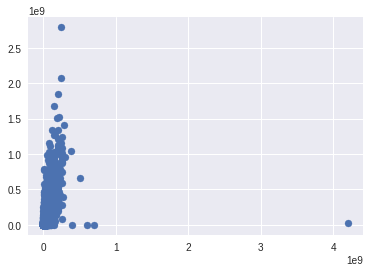

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(dfMoviesUS[dfMoviesUS['budget_final']>0]['budget_final'], dfMoviesUS[dfMoviesUS['budget_final']>0]['revenue_final'])

In [0]:
#Revenue vs variables de actores, excluidos los nulos de budget y 7 outliers, con log. R2 25%.
#X=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']].applymap(lambda x: np.log(x+1))
#y=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['revenue_final']].applymap(lambda x: np.log(x))

In [0]:
#Revenue vs variables de actores, excluidos los nulos de budget y 7 outliers, con log. R2 25%.
X=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
y=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['revenue_final']].applymap(lambda x: np.log(x))

In [0]:
#OJO: quité el ".values" porque si no me petaba el pipeline que encadené.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [0]:
from sklearn.pipeline import make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

In [0]:
def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low']]

def get_log_cols(df):
    return df[['OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))

In [0]:
#model_1 = LinearRegression()

In [0]:
model_1 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('linear_regression', LinearRegression())
                   ]) 

In [0]:
#Lo hace bien?
#model_test = make_union(
#    FunctionTransformer(get_not_log_cols, validate=False), 
#    make_pipeline(FunctionTransformer(get_log_cols, validate=False), FunctionTransformer(log_1, validate=False))
#)

#model_test.transform(X).shape

In [137]:
model_1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function get_not_log_cols at 0x7f1bcdc58620>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False))...('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [139]:
import math
math.sqrt(mean_squared_error(y_test,model_1.predict(X_test)))

2.030380146193297

In [140]:
mean_absolute_percentage_error(y_test,model_1.predict(X_test))

revenue_final    10.36955
dtype: float64

In [141]:
r2_score(y_test,model_1.predict(X_test))

0.2620551263122315

In [142]:
# The coefficients
pd.Series(model_1.named_steps['linear_regression'].coef_[0], index=X.columns)

3FirstRoles_High      0.513780
3FirstRoles_Medium    0.431432
3FirstRoles_Low       0.425245
OtherRoles_High       0.628082
OtherRoles_Medium     0.343745
OtherRoles_Low        0.685121
dtype: float64

In [143]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_1.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_1.predict(X_test)))

Mean squared error: 4.12
Variance score: 0.26


In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_1, X, y, cv=10)

array([0.21051979, 0.21371876, 0.27879423, 0.26243609, 0.21237856,
       0.27341971, 0.2084281 , 0.25676895, 0.29866649, 0.22369106])

In [145]:
cross_val_score(model_1, X, y, cv=10).mean()

0.24388217502226855

In [0]:
#¿Por qué ahora no me sale bien?!!!
#plt.hist((np.abs(y_test - model_1.predict(X_test)) / y_test)),bins=100);

###Voy a seguir creando variables:

####Incorporación de la inflación a revenue y budget:

In [147]:
my_file_path='./InflationConverter.xlsx'
dfInflationConverter = pd.read_excel(my_file_path)
dfInflationConverter.shape

(106, 2)

In [0]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! QUITAR CUANDO PONGA MÁS ATRÁS UN NOMBRE CORRECTO.
dfMoviesUS = dfMoviesUS.rename(columns={'revenue_final': 'revenue_tmdb_imdb', 'budget_final': 'budget_tmdb_imdb'})

In [149]:
dfMoviesUS['release_year'] = dfMoviesUS['release_date'].map(lambda datetime: datetime.year)
#El mes lo pongo como string, porque así entrará en mi modelo:
dfMoviesUS['release_month'] = dfMoviesUS['release_date'].map(lambda datetime: str(datetime.month))
dfMoviesUS.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'imdb_id', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'reviews_page',
       'reviews_total_pages', 'reviews_total_results', 'runtime', 'status',
       'tagline', 'title', 'titles', 'vote_average', 'vote_count',
       'imdb_revenue', 'imdb_budget', 'director_facebook_likes',
       'cast_total_facebook_likes', 'movie_facebook_likes',
       'revenue_tmdb_imdb', 'budget_tmdb_imdb', 'belongs_to_collection',
       '3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low',
       'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low',
       'release_year', 'release_month'],
      dtype='object')

In [0]:
dfMoviesUS = dfMoviesUS.merge(dfInflationConverter, how='inner', left_on='release_year', right_on='Year').drop('Year', axis=1)

In [151]:
dfMoviesUS['revenue_inflation_adjusted'] = dfMoviesUS['revenue_tmdb_imdb'] * dfMoviesUS['InflationConverter']/100
dfMoviesUS['budget_inflation_adjusted'] = dfMoviesUS['budget_tmdb_imdb'] * dfMoviesUS['InflationConverter']/100
dfMoviesUS[['revenue_inflation_adjusted', 'budget_inflation_adjusted', 'revenue_tmdb_imdb', 'budget_tmdb_imdb']].isnull().sum()

revenue_inflation_adjusted       0
budget_inflation_adjusted     2128
revenue_tmdb_imdb                0
budget_tmdb_imdb              2128
dtype: int64

####Genres

In [0]:
#Incluyo, de momento, un campo para cada género:
for genre in dfMoviesGenres.merge(dfMoviesUS, how='inner', on='movie_id')['name'].unique():
    dfMoviesUS['ind'+genre]=0

In [0]:
#Necesito ver qué combinaciones de géneros hay:
def update_genres():
    for genre in dfMoviesGenres.merge(dfMoviesUS, how='inner', on='movie_id')['name'].unique():
        genres_ids_list = dfMoviesGenres[dfMoviesGenres['name']==genre].merge(dfMoviesUS, how='inner', on='movie_id')['movie_id'].tolist()
        dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(genres_ids_list), 'ind'+genre] = 1

update_genres()        

In [0]:
dfMoviesUS['IND_AnimationMusic']=0
dfMoviesUS['IND_FantasyScienceFiction']=0
dfMoviesUS['IND_DocumentaryHistoryWar']=0
dfMoviesUS['IND_Romance']=0
dfMoviesUS['IND_Comedy']=0
dfMoviesUS['IND_ThrillerHorrorActionCrimeMystery']=0
dfMoviesUS['IND_Drama']=0

In [0]:
dfMoviesUS.loc[(dfMoviesUS['indAnimation']==1) | (dfMoviesUS['indMusic']==1), 'IND_AnimationMusic'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & 
               ((dfMoviesUS['indFantasy']==1) | (dfMoviesUS['indScience Fiction']==1)), 
               'IND_FantasyScienceFiction'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & 
               ((dfMoviesUS['indDocumentary']==1) | (dfMoviesUS['indHistory']==1) | (dfMoviesUS['indWar']==1)), 
               'IND_DocumentaryHistoryWar'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['indRomance']==1), 
               'IND_Romance'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['indComedy']==1), 
               'IND_Comedy'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['IND_Comedy']==0) & 
               ((dfMoviesUS['indThriller']==1) | (dfMoviesUS['indHorror']==1) | (dfMoviesUS['indAction']==1) | 
                (dfMoviesUS['indCrime']==1) | (dfMoviesUS['indMystery']==1)), 
               'IND_ThrillerHorrorActionCrimeMystery'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['IND_Comedy']==0) & (dfMoviesUS['IND_ThrillerHorrorActionCrimeMystery']==0) &
               (dfMoviesUS['indDrama']==1), 
               'IND_Drama'] = 1

In [0]:
#Incluyo los poquitos "Western" en DocumentaryHistoryWar:
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['IND_Comedy']==0) & (dfMoviesUS['IND_ThrillerHorrorActionCrimeMystery']==0) &
               (dfMoviesUS['IND_Drama']==0) & (dfMoviesUS['indWestern']==1), 
               'IND_DocumentaryHistoryWar'] = 1
#Incluyo los poquitos "Adventure" en FantasyScienceFiction:
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['IND_Comedy']==0) & (dfMoviesUS['IND_ThrillerHorrorActionCrimeMystery']==0) &
               (dfMoviesUS['IND_Drama']==0) & (dfMoviesUS['indAdventure']==1), 
               'IND_FantasyScienceFiction'] = 1
#Incluyo los poquitos "Family" en Comedy:
dfMoviesUS.loc[(dfMoviesUS['IND_AnimationMusic']==0) & (dfMoviesUS['IND_FantasyScienceFiction']==0) & (dfMoviesUS['IND_DocumentaryHistoryWar']==0) &
               (dfMoviesUS['IND_Romance']==0) & (dfMoviesUS['IND_Comedy']==0) & (dfMoviesUS['IND_ThrillerHorrorActionCrimeMystery']==0) &
               (dfMoviesUS['IND_Drama']==0) & (dfMoviesUS['indFamily']==1), 
               'IND_Comedy'] = 1


In [0]:
#Me cargo las columnas ind:
dfMoviesUS = dfMoviesUS.drop(dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist(), axis=1)

In [0]:
#!!!!!!!!!!!!!!!!!!! OJO: NO TENGO QUE METER TODOS LOS INDICADORES, SINO UNO MENOS.

####Original Language

In [0]:
dfMoviesUS['indLang_ENG'] = dfMoviesUS['original_language'].map(lambda str: 1 if str=='en' else 0)

####Production countries

In [0]:
#Incluyo, de momento, un campo para cada género:
dfMoviesUS['IND_Prod_US']=0
dfMoviesUS['IND_Prod_GB']=0
dfMoviesUS['IND_Prod_CA']=0
dfMoviesUS['IND_Prod_AU']=0
dfMoviesUS['IND_Prod_EUN']=0
dfMoviesUS['IND_Prod_OTH']=0

In [0]:
def update_production_countries():
    for country in ['US', 'GB', 'CA', 'AU']:
        countries_id_list = dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1']==country].merge(dfMoviesUS, how='inner', on='movie_id')['movie_id'].tolist()
        dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(countries_id_list), 'IND_Prod_'+country] = 1
     
    #Other European countries
    countries_id_list = dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1'].isin(['FR', 'DE', 'IT', 'RU', 'ES', 'IE', 'BE', 'SE',
                                                                                                  'DK', 'NL', 'CZ', 'CH', 'NO', 'PL', 'LU', 'AT', 'CS',
                                                                                                  'MK', 'LT', 'LI', 'BY', 'BA', 'RO', 'HU', 'FI', 'IS',
                                                                                                  'GR', 'BG', 'UA', 'MT', 'PT', 'HR', 'MC', 'RS', 'GE',
                                                                                                  'SU', 'SI', 'SK', 'AM'])].merge(dfMoviesUS, how='inner', on='movie_id')['movie_id'].tolist()
    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(countries_id_list), 'IND_Prod_EUN'] = 1
    
    #Rest of countries                                                    
    other_countries_list = list(set(dfMoviesProductionCountries.merge(dfMoviesUS, how='inner', on='movie_id')['iso_3166_1'].unique()) - set(['FR', 'DE', 
                                 'IT', 'RU', 'ES', 'IE', 'BE', 'SE', 'DK', 'NL', 'CZ', 'CH', 'NO', 'PL', 'LU', 'AT', 'CS', 'MK', 'LT', 'LI', 'BY', 'BA', 
                                 'RO', 'HU', 'FI', 'IS', 'GR', 'BG', 'UA', 'MT', 'PT', 'HR', 'MC', 'RS', 'GE', 'SU', 'SI', 'SK', 'AM', 'US', 'GB', 'CA',
                                 'AU']))                                                
    countries_id_list = dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1'].isin(other_countries_list)].merge(dfMoviesUS, how='inner', on='movie_id')['movie_id'].tolist()
    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(countries_id_list), 'IND_Prod_OTH'] = 1                                                        
                                                    
                                                    
update_production_countries()   

In [0]:
dfMoviesUS['indCountries_US_only'] = 0
dfMoviesUS['indCountries_US_and_oth'] = 0
dfMoviesUS['indCountries_Eur_only'] = 0
dfMoviesUS['indCountries_Other'] = 0

In [0]:
dfMoviesUS.loc[(dfMoviesUS['IND_Prod_US']==1) & (dfMoviesUS['IND_Prod_GB']==0) & (dfMoviesUS['IND_Prod_CA']==0) & 
               (dfMoviesUS['IND_Prod_AU']==0) & (dfMoviesUS['IND_Prod_EUN']==0) & (dfMoviesUS['IND_Prod_OTH']==0), 
               'indCountries_US_only'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_Prod_US']==0) & (dfMoviesUS['IND_Prod_CA']==0) & (dfMoviesUS['IND_Prod_AU']==0) & 
               (dfMoviesUS['IND_Prod_OTH']==0) & ((dfMoviesUS['IND_Prod_EUN']==1) | (dfMoviesUS['IND_Prod_GB']==1)), 
               'indCountries_Eur_only'] = 1
dfMoviesUS.loc[(dfMoviesUS['IND_Prod_US']==1) & (dfMoviesUS['indCountries_US_only']==0), 
               'indCountries_US_and_oth'] = 1
dfMoviesUS.loc[(dfMoviesUS['indCountries_US_only']==0) & (dfMoviesUS['indCountries_US_and_oth']==0) & (dfMoviesUS['indCountries_Eur_only']==0) & 
               ((dfMoviesUS['IND_Prod_GB']==1) | (dfMoviesUS['IND_Prod_CA']==1) | (dfMoviesUS['IND_Prod_AU']==1) |
                (dfMoviesUS['IND_Prod_EUN']==1) | (dfMoviesUS['IND_Prod_OTH']==1)), 
               'indCountries_Other'] = 1

In [0]:
#Me cargo las columnas ind:
dfMoviesUS = dfMoviesUS.drop(dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('IND_Prod')].tolist(), axis=1)

####Production companies

####Calificación

In [0]:
#Había duplicados (4) pero al final no me salen. Porque debían ser en las categorías que agrupé.

In [0]:
#Y viendo ya el volumen, agrupo algunas certificaciones:
dfMoviesUS['indCertific_G_PG'] = 0
dfMoviesUS['indCertific_PG13'] = 0
dfMoviesUS['indCertific_R_NC17'] = 0

In [0]:
def update_certifications():
    #dfTmp have only once US certification (G, PG, PG-13, R or NC-17) per movie.
    dfTmp = dfMoviesReleaseDates[(dfMoviesReleaseDates['iso_3166_1']=='US') & (dfMoviesReleaseDates['certification'].isin(['G', 'PG', 'PG-13', 'R', 'NC-17']))].merge(dfMoviesUS, how='inner', on='movie_id')[['movie_id', 'certification']].drop_duplicates(subset='movie_id', keep='first')
    
    certific_id_list = dfTmp[dfTmp['certification'].isin(['G', 'PG'])]['movie_id'].tolist()
    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(certific_id_list), 'indCertific_G_PG'] = 1                                                        

    certific_id_list = dfTmp[dfTmp['certification']=='PG-13']['movie_id'].tolist()
    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(certific_id_list), 'indCertific_PG13'] = 1                                                        

    certific_id_list = dfTmp[dfTmp['certification'].isin(['R', 'NC-17'])]['movie_id'].tolist()
    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(certific_id_list), 'indCertific_R_NC17'] = 1                                                        

update_certifications()       

In [168]:
#Y ahora veo todas las combinaciones posibles distintas:
#No creo la variable "NR", que se deduce del resto.
dfMoviesUS.groupby(dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('indCertific')].tolist())['status'].count().reset_index().sort_values(by='status', ascending=False)

,indCertific_G_PG,indCertific_PG13,indCertific_R_NC17,status
1,0,0,1,3348
2,0,1,0,1998
0,0,0,0,1586
3,1,0,0,1441


####Annual increase effect

In [0]:
dfMoviesUS['intAnnual'] = dfMoviesUS['release_year']-dfMoviesUS['release_year'].min()

####CREW

In [175]:
#Me quedaría con:
dfJobsAux = dfMoviesCrew.merge(dfMoviesUS, how='inner', on='movie_id').groupby(['department', 'job'])['status'].count().reset_index().sort_values(by='status', ascending=False).head(13).reset_index()[['department', 'job']]
dfJobsAux

,department,job
0,Production,Producer
1,Production,Executive Producer
2,Directing,Director
3,Editing,Editor
4,Writing,Screenplay
5,Production,Casting
6,Camera,Director of Photography
7,Sound,Original Music Composer
8,Art,Art Direction
9,Art,Production Design


In [176]:
#Voy a tomar todos los crew de todas mis películas en los trabajos anteriores a ver qué info tengo de lo que han trabajado:
dfCrewIds = pd.DataFrame(dfMoviesCrew.merge(dfMoviesUS[['movie_id']], how='inner').merge(dfJobsAux, how='inner', on=['department', 'job'])['id'].unique(), columns=['people_id'])
dfCrewIds.shape

(31456, 1)

In [178]:
#Para facilitar la escritura en adelante, me quedo en dfPeopleMoviesCrew con mis crew y sus pelis, y los trabajos seleccionados

dfPeopleMoviesCrew = dfPeopleMoviesCrew.merge(dfCrewIds, how='inner').merge(dfJobsAux, how='inner', on=['department', 'job'])
dfPeopleMoviesCrew.shape

(259391, 13)

In [180]:
#Cruzo con dfMoviesAll para incorporar la información del presupuesto:
dfPeopleMoviesCrew = dfPeopleMoviesCrew.merge(dfMoviesAll[['movie_id','budget_final']], how='left', left_on='id', right_on='movie_id')
dfPeopleMoviesCrew.shape

(259391, 15)

In [182]:
#Elimino uno de los campos que incorporé que no me hace falta:
dfPeopleMoviesCrew = dfPeopleMoviesCrew.drop('movie_id', axis=1)
dfPeopleMoviesCrew.columns

Index(['adult', 'department', 'genre_ids', 'id', 'job', 'original_language',
       'original_title', 'people_id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'budget_final'],
      dtype='object')

In [0]:
dfPeopleMoviesCrew['release_year'] = dfPeopleMoviesCrew['release_date'].map(lambda datetime: datetime.year)

In [186]:
dfPeopleMoviesCrew = dfPeopleMoviesCrew.merge(dfInflationConverter, how='inner', left_on='release_year', right_on='Year').drop('Year', axis=1)
dfPeopleMoviesCrew.shape

(254330, 16)

In [0]:
dfPeopleMoviesCrew['budget_converted'] = dfPeopleMoviesCrew['budget_final'] * dfPeopleMoviesCrew['InflationConverter']/100

In [190]:
#Ahora sale más, porque son pelis donde están todos estos trabajos
#¿Qué sesgo estoy cometiendo al hacer esto?!!!!!!!!!!!!! (completar tantos 0's con la mediana)
auxBudgetMedian = dfPeopleMoviesCrew.drop_duplicates(subset='id', keep='first')['budget_converted'].median()
auxBudgetMedian

12644250.0

In [0]:
#Hago el cambio:     ¿DEBERÍA HABER CREADO UN CAMPO MARCANDO QUÉ VALORES ERAN NULOS?!!!!! Bueno, son los valores con nulo en budget_final
#Antes de hacerlo, estaría bien ver los cuartiles de esta variable, para ver si el criterio que tomaré después de "gran producción" es razonable.
dfPeopleMoviesCrew = dfPeopleMoviesCrew.fillna({'budget_converted': auxBudgetMedian})

In [0]:
#Mantengo el mismo criterio de "big production", aunque es discutible (pero argumentable)
dfPeopleMoviesCrew['BigProduc'] = dfPeopleMoviesCrew['budget_converted']>17e6
dfPeopleMoviesCrew['SmallProduc'] = dfPeopleMoviesCrew['budget_converted']<=17e6

In [0]:
dfAuxPeopleCluster = dfPeopleMoviesCrew.groupby(['department', 'job', 'people_id'])[['BigProduc', 'SmallProduc']].sum().reset_index()

In [0]:
#¿Y si en lugar del escaler hago una traslación+log? MEGUSTA ESTE!!!! Lo prefiero al siguiente (en el siguiente los clusters que más trabajan crecen en volumen)
dfAuxPeopleCluster['cluster'] = None
from sklearn.cluster import KMeans

def aux():
    global dfMoviesUS
    dfTmp1 = pd.DataFrame()
    dfTmp2 = pd.DataFrame()
    
    for ind in dfJobsAux.index:
        kmeansCrew = KMeans(n_clusters=3, random_state=0)
        #Ajusto el kmeans
        kmeansCrew.fit(dfAuxPeopleCluster[(dfAuxPeopleCluster['department']==dfJobsAux.iloc[ind,0]) & (dfAuxPeopleCluster['job']==dfJobsAux.iloc[ind,1])][['BigProduc', 'SmallProduc']].applymap(lambda x: np.log(x+1)))
        #Hago la predicción para
        dfAuxPeopleCluster.loc[(dfAuxPeopleCluster['department']==dfJobsAux.iloc[ind,0]) & (dfAuxPeopleCluster['job']==dfJobsAux.iloc[ind,1]),'cluster'] = kmeansCrew.predict(dfAuxPeopleCluster[(dfAuxPeopleCluster['department']==dfJobsAux.iloc[ind,0]) & (dfAuxPeopleCluster['job']==dfJobsAux.iloc[ind,1])][['BigProduc', 'SmallProduc']].applymap(lambda x: np.log(x+1)))
        #Creo una tabla con lo que ha trabajado cada uno hasta nuestra peli        
        dfTmp1 = dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCrew[(dfMoviesCrew['department']==dfJobsAux.iloc[ind,0]) & (dfMoviesCrew['job']==dfJobsAux.iloc[ind,1])][['movie_id', 'id', 'department', 'job']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCrew[['id', 'people_id', 'release_date', 'department', 'job', 'BigProduc', 'SmallProduc']], how='left', on=['people_id', 'department', 'job'])[dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCrew[(dfMoviesCrew['department']==dfJobsAux.iloc[ind,0]) & (dfMoviesCrew['job']==dfJobsAux.iloc[ind,1])][['movie_id', 'id', 'department', 'job']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCrew[['id', 'people_id', 'release_date', 'department', 'job', 'BigProduc', 'SmallProduc']], how='left', on=['people_id', 'department', 'job'])['release_date_y']<dfMoviesUS[['movie_id', 'release_date']].merge(dfMoviesCrew[(dfMoviesCrew['department']==dfJobsAux.iloc[ind,0]) & (dfMoviesCrew['job']==dfJobsAux.iloc[ind,1])][['movie_id', 'id', 'department', 'job']], how='left', on='movie_id').rename(columns={'id': 'people_id'}).merge(dfPeopleMoviesCrew[['id', 'people_id', 'release_date', 'department', 'job', 'BigProduc', 'SmallProduc']], how='left', on=['people_id', 'department', 'job'])['release_date_x']].groupby(['movie_id', 'people_id', 'department', 'job'])[['BigProduc', 'SmallProduc']].sum().reset_index()
        #Clasifico a cada crew en ese momento por su trabajo en ese trabajo hasta la fecha:
        dfTmp1['cluster'] = kmeansCrew.predict(dfTmp1[['BigProduc', 'SmallProduc']].applymap(lambda x: np.log(x+1)))
        #Creo variables auxiliares
        dfTmp1[dfJobsAux.iloc[ind,1]+'_0'] = (dfTmp1['cluster']==0)
        dfTmp1[dfJobsAux.iloc[ind,1]+'_1'] = (dfTmp1['cluster']==1)
        dfTmp1[dfJobsAux.iloc[ind,1]+'_2'] = (dfTmp1['cluster']==2)
        
        #Crew sin histórico no serán contabilizados
        dfTmp2 = dfTmp1.groupby('movie_id')[[dfJobsAux.iloc[ind,1]+'_0', dfJobsAux.iloc[ind,1]+'_1', dfJobsAux.iloc[ind,1]+'_2']].sum().reset_index()
        dfTmp2[dfJobsAux.iloc[ind,1]+'_All'] = dfTmp2[dfJobsAux.iloc[ind,1]+'_0'] + dfTmp2[dfJobsAux.iloc[ind,1]+'_1'] + dfTmp2[dfJobsAux.iloc[ind,1]+'_2']
        
        for strNum in ['0', '1', '2']:
            dfTmp2['percent' + dfJobsAux.iloc[ind,1]+'_'+strNum] = 0
            dfTmp2.loc[dfTmp2[dfJobsAux.iloc[ind,1]+'_All'] != 0,'percent'+dfJobsAux.iloc[ind,1]+'_'+strNum] = dfTmp2.loc[dfTmp2[dfJobsAux.iloc[ind,1]+'_All'] != 0, dfJobsAux.iloc[ind,1]+'_'+strNum] / dfTmp2.loc[dfTmp2[dfJobsAux.iloc[ind,1]+'_All'] != 0, dfJobsAux.iloc[ind,1]+'_All']
            dfTmp2.loc[dfTmp2[dfJobsAux.iloc[ind,1]+'_All'] == 0,'percent'+dfJobsAux.iloc[ind,1]+'_'+strNum] = 0
        
        dfMoviesUS = dfMoviesUS.merge(dfTmp2[['movie_id'] + dfTmp2.columns[dfTmp2.columns.str.startswith('percent')].tolist()], how='left', on='movie_id')
        dfMoviesUS = dfMoviesUS.fillna({'percent'+dfJobsAux.iloc[ind,1]+'_0': 0, 'percent'+dfJobsAux.iloc[ind,1]+'_1': 0, 'percent'+dfJobsAux.iloc[ind,1]+'_2': 0})   

In [0]:
aux()

##MODELLING

In [0]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! QUITAR CUANDO PONGA MÁS ATRÁS UN NOMBRE CORRECTO.
dfMoviesUS = dfMoviesUS.rename(columns={'IND_AnimationMusic': 'indAnimationMusic', 'IND_FantasyScienceFiction': 'indFantasyScienceFiction',
                                       'IND_DocumentaryHistoryWar': 'indDocumentaryHistoryWar', 'IND_Romance': 'indRomance',
                                       'IND_Comedy': 'indComedy', 'IND_ThrillerHorrorActionCrimeMystery': 'indThrillerHorrorActionCrimeMystery',
                                       'IND_Drama': 'indDrama'})

In [0]:
dfMoviesUS.index = dfMoviesUS['movie_id']

In [0]:
#Voy a seleccionar todas las variables que van a entrar en mi modelo inicialmente
myFeaturesList = ['budget_inflation_adjusted', 'runtime', 'belongs_to_collection', 'release_month', 'intAnnual'] + dfMoviesUS.columns[dfMoviesUS.columns.str.contains('Roles')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('ind')].tolist() + dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('percent')].tolist()
myFeaturesList

In [297]:
dfMoviesUS[dfMoviesUS.columns[dfMoviesUS.columns.isin(myFeaturesList)]].shape

(8373, 66)

In [298]:
#Sólo tengo una categórica: el mes. El resto son numéricas o ya variables indicador.
dfMoviesUS[dfMoviesUS.columns[dfMoviesUS.columns.isin(myFeaturesList)]].dtypes

runtime                                float64
belongs_to_collection                    int64
3FirstRoles_High                       float64
3FirstRoles_Medium                     float64
3FirstRoles_Low                        float64
OtherRoles_High                        float64
OtherRoles_Medium                      float64
OtherRoles_Low                         float64
release_month                           object
revenue_inflation_adjusted             float64
budget_inflation_adjusted              float64
indAnimationMusic                        int64
indFantasyScienceFiction                 int64
indDocumentaryHistoryWar                 int64
indRomance                               int64
indComedy                                int64
indThrillerHorrorActionCrimeMystery      int64
indDrama                                 int64
indLang_ENG                              int64
indCountries_US_only                     int64
indCountries_US_and_oth                  int64
indCountries_

In [303]:
#Las únicas variables con nulos son runtime y budget_inflation_adjusted. Para cast y crew tomé el criterio de transformarlos en 0.
dfMoviesUS[dfMoviesUS.columns[dfMoviesUS.columns.isin(myFeaturesList)]].isnull().sum()

runtime                                  23
belongs_to_collection                     0
3FirstRoles_High                          0
3FirstRoles_Medium                        0
3FirstRoles_Low                           0
OtherRoles_High                           0
OtherRoles_Medium                         0
OtherRoles_Low                            0
release_month                             0
revenue_inflation_adjusted                0
budget_inflation_adjusted              2128
indAnimationMusic                         0
indFantasyScienceFiction                  0
indDocumentaryHistoryWar                  0
indRomance                                0
indComedy                                 0
indThrillerHorrorActionCrimeMystery       0
indDrama                                  0
indLang_ENG                               0
indCountries_US_only                      0
indCountries_US_and_oth                   0
indCountries_Eur_only                     0
indCountries_Other              

In [304]:
#¿Tengo 0's en estas variables?
dfMoviesUS[['revenue_inflation_adjusted', 'budget_inflation_adjusted', 'runtime']].applymap(lambda x: x==0).sum()

revenue_inflation_adjusted    0
budget_inflation_adjusted     0
runtime                       0
dtype: int64

#####Outliers-errores:

In [0]:
dfMoviesUS['budget_tmdb_imdb_corrected'] = None
dfMoviesUS['revenue_tmdb_imdb_corrected'] = None

In [317]:
#¿Qué pelis tienen presupuesto mayor que el de avatar?
dfMoviesUS[dfMoviesUS['budget_inflation_adjusted']>425e6].shape[0]

7

In [331]:
dfMoviesUS[dfMoviesUS['budget_inflation_adjusted']>425e6][['movie_id', 'title', 'release_year', 'budget_inflation_adjusted', 'budget_tmdb_imdb', 'budget_tmdb_imdb_corrected', 'revenue_inflation_adjusted', 'revenue_tmdb_imdb', 'revenue_tmdb_imdb_corrected','indCountries_US_only', 'indCountries_US_and_oth', 'indLang_ENG']]

,movie_id,title,release_year,budget_inflation_adjusted,budget_tmdb_imdb,budget_tmdb_imdb_corrected,revenue_inflation_adjusted,revenue_tmdb_imdb,revenue_tmdb_imdb_corrected,indCountries_US_only,indCountries_US_and_oth,indLang_ENG
movie_id,,,,,,,,,,,,
1865,1865,Pirates of the Caribbean: On Stranger Tides,2011,426474000.0,380000000.0,None,1.173605e+09,1.045714e+09,None,1,0,1


In [0]:
#https://www.the-numbers.com/movie/Tango#tab=summary
#https://www.imdb.com/title/tt0120274/?ref_=fn_al_tt_2
dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'budget_tmdb_imdb'] = 4.5e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==65749, 'revenue_tmdb_imdb'] = 5428387

In [0]:
#https://www.imdb.com/title/tt0056218/
#https://www.the-numbers.com/search?searchterm=the+manchurian+candidate
dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'budget_tmdb_imdb'] = 2.2e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==982, 'revenue_tmdb_imdb'] = 7.7e6

In [0]:
#https://www.imdb.com/title/tt0974015/?ref_=nv_sr_1
dfMoviesUS.loc[dfMoviesUS['movie_id']==141052, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==141052, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==141052, 'budget_tmdb_imdb'] = 3e8

In [0]:
#https://www.the-numbers.com/movie/budgets
#https://www.imdb.com/title/tt1298650/?ref_=fn_al_tt_1
#Piratas del caribe: ingresos correcto. Budget: no hay base para decir que esté mal.

In [0]:
#https://www.the-numbers.com/movie/Chinjeolhan-geumjassi#tab=summary
#https://www.imdb.com/title/tt0451094/?ref_=nv_sr_1
dfMoviesUS.loc[dfMoviesUS['movie_id']==4550, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==4550, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==4550, 'budget_tmdb_imdb'] = 4.5e6

In [0]:
#https://www.the-numbers.com/movie/Kites#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'budget_tmdb_imdb'] = 9.2e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==37737, 'revenue_tmdb_imdb'] = 17155193

In [0]:
#https://www.the-numbers.com/movie/Legend-of-Suriyothai-The#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==27329, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==27329, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==27329, 'budget_tmdb_imdb'] = 9e6

In [345]:
#¿Cuáles son las pelis más taquilleras?
dfMoviesUS[['movie_id', 'title', 'release_year', 'revenue_inflation_adjusted', 'revenue_tmdb_imdb', 'revenue_tmdb_imdb_corrected', 'budget_inflation_adjusted', 'budget_tmdb_imdb', 'budget_tmdb_imdb_corrected', 'indCountries_US_only', 'indCountries_US_and_oth', 'indLang_ENG']].sort_values(by='revenue_inflation_adjusted', ascending=False).head(10)

,movie_id,title,release_year,revenue_inflation_adjusted,revenue_tmdb_imdb,revenue_tmdb_imdb_corrected,budget_inflation_adjusted,budget_tmdb_imdb,budget_tmdb_imdb_corrected,indCountries_US_only,indCountries_US_and_oth,indLang_ENG
movie_id,,,,,,,,,,,,
19995,19995,Avatar,2009,3.280599e+09,2.787965e+09,None,278877900.0,237000000.0,None,0,1,1
11,11,Star Wars,1977,3.230075e+09,7.753980e+08,None,45822700.0,11000000.0,None,1,0,1
597,597,Titanic,1997,2.901870e+09,1.845034e+09,None,314560000.0,200000000.0,None,1,0,1
11224,11224,Cinderella,1950,2.761015e+09,2.635914e+08,None,30376340.0,2900000.0,None,1,0,1
9552,9552,The Exorcist,1973,2.449205e+09,4.307733e+08,4.41306e+08,68227200.0,12000000.0,8e+06,1,0,1
15121,15121,The Sound of Music,1965,2.293693e+09,2.862143e+08,None,65713980.0,8200000.0,None,1,0,1
578,578,Jaws,1975,2.208619e+09,4.707000e+08,None,37537600.0,8000000.0,7e+06,1,0,1
140607,140607,Star Wars: The Force Awakens,2015,2.202865e+09,2.068224e+09,None,260949500.0,245000000.0,None,1,0,1
601,601,E.T. the Extra-Terrestrial,1982,2.074318e+09,7.929653e+08,None,27466950.0,10500000.0,None,1,0,1


In [0]:
#https://www.imdb.com/title/tt0073195/?ref_=fn_al_tt_1
dfMoviesUS.loc[dfMoviesUS['movie_id']==578, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==578, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==578, 'budget_tmdb_imdb'] = 8e6

In [0]:
#https://www.the-numbers.com/movie/Exorcist-The#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'budget_tmdb_imdb'] = 12e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==9552, 'revenue_tmdb_imdb'] = 430773277

In [0]:
#https://www.imdb.com/title/tt0043274/?ref_=fn_al_tt_2
dfMoviesUS.loc[dfMoviesUS['movie_id']==12092, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==12092, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==12092, 'revenue_tmdb_imdb'] = 5232000

In [0]:
#Avatar: ok
#https://www.imdb.com/title/tt0499549/?ref_=fn_al_tt_1

In [0]:
#¿Cuáles son las películas mas rentables?

In [347]:
dfMoviesUS['profit_inflation_adjusted'] = dfMoviesUS['revenue_inflation_adjusted'] - dfMoviesUS['budget_inflation_adjusted']
dfMoviesUS[['budget_inflation_adjusted', 'revenue_inflation_adjusted', 'profit_inflation_adjusted']].isnull().sum()

budget_inflation_adjusted     2128
revenue_inflation_adjusted       0
profit_inflation_adjusted     2128
dtype: int64

In [0]:
dfMoviesUS[['movie_id', 'title', 'release_year', 'profit_inflation_adjusted', 'revenue_inflation_adjusted', 'revenue_tmdb_imdb', 'revenue_tmdb_imdb_corrected', 'budget_inflation_adjusted', 'budget_tmdb_imdb', 'budget_tmdb_imdb_corrected', 'indCountries_US_only', 'indCountries_US_and_oth', 'indLang_ENG']].sort_values(by='profit_inflation_adjusted', ascending=False).head(10)

In [362]:
#¿Y las menos rentables?
dfMoviesUS[dfMoviesUS['profit_inflation_adjusted'].notnull()][['movie_id', 'title', 'release_year', 'profit_inflation_adjusted', 'revenue_inflation_adjusted', 'revenue_tmdb_imdb', 'revenue_tmdb_imdb_corrected', 'budget_inflation_adjusted', 'budget_tmdb_imdb', 'budget_tmdb_imdb_corrected', 'indCountries_US_only', 'indCountries_US_and_oth', 'indLang_ENG']].sort_values(by='profit_inflation_adjusted', ascending=False).tail(10)

,movie_id,title,release_year,profit_inflation_adjusted,revenue_inflation_adjusted,revenue_tmdb_imdb,revenue_tmdb_imdb_corrected,budget_inflation_adjusted,budget_tmdb_imdb,budget_tmdb_imdb_corrected,indCountries_US_only,indCountries_US_and_oth,indLang_ENG
movie_id,,,,,,,,,,,,,
42586,42586,Darling Lili,1970,-1.301240e+08,3.253100e+07,5000000.0,None,162655000.0,25000000.0,None,1,0,1
11692,11692,The Adventures of Pluto Nash,2002,-1.303517e+08,9.968295e+06,7103973.0,None,140320000.0,100000000.0,None,0,1,1
48217,48217,The Widow of Saint-Pierre,2000,-1.421164e+08,4.483585e+06,3058380.0,None,146600000.0,15315028.0,1e+08,0,0,1
33157,33157,Waterloo,1970,-1.427981e+08,1.985692e+07,3052000.0,None,162655000.0,25000000.0,None,0,0,1
9045,9045,Amen.,2002,-1.441447e+08,3.848964e+05,274299.0,None,144529600.0,14000000.0,1.03e+08,0,0,0
1408,1408,Cutthroat Island,1995,-1.457345e+08,1.659269e+07,18517322.0,1.00173e+07,162327200.0,92000000.0,9.8e+07,0,1,1
1911,1911,The 13th Warrior,1999,-1.489458e+08,9.348617e+07,61698899.0,None,242432000.0,160000000.0,None,1,0,1
10733,10733,The Alamo,2004,-1.592722e+08,3.450580e+07,23911362.0,2.582e+07,193778000.0,92000000.0,1.45e+08,1,0,1
57201,57201,The Lone Ranger,2013,-1.795635e+08,9.675455e+07,260002115.0,8.92899e+07,276318000.0,275000000.0,2.55e+08,1,0,1


In [0]:
#https://www.the-numbers.com/movie/Cutthroat-Island#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==48217, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==48217, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==48217, 'budget_tmdb_imdb'] = 15315028

In [0]:
#Sin otrars referencias de Waterloo

In [0]:
#https://www.the-numbers.com/movie/Cutthroat-Island#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'budget_tmdb_imdb'] = 92e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==1408, 'revenue_tmdb_imdb'] = 18517322

In [0]:
#https://www.the-numbers.com/movie/Amen#tab=summary
#https://www.imdb.com/title/tt0280653/?ref_=fn_al_tt_1
dfMoviesUS.loc[dfMoviesUS['movie_id']==9045, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==9045, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==9045, 'budget_tmdb_imdb'] = 14e6

In [0]:
#https://www.the-numbers.com/movie/Alamo-The-(2004)#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'budget_tmdb_imdb'] = 92e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==10733, 'revenue_tmdb_imdb'] = 23911362

In [0]:
#https://www.the-numbers.com/movie/Lone-Ranger-The#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'budget_tmdb_imdb'] = 275e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==57201, 'revenue_tmdb_imdb'] = 260002115

In [0]:
#https://www.the-numbers.com/movie/Couloirs-du-temps-Les-visiteurs-2-Les#tab=summary
dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'budget_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'budget_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'budget_tmdb_imdb'] = 20e6

#Worldwide box office numbers if they are available. Otherwise US only is fine.
dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'revenue_tmdb_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'revenue_tmdb_imdb']
dfMoviesUS.loc[dfMoviesUS['movie_id']==10353, 'revenue_tmdb_imdb'] = 26146072

In [0]:
#Tras las correcciones, recalculo todo:
dfMoviesUS['revenue_inflation_adjusted'] = dfMoviesUS['revenue_tmdb_imdb'] * dfMoviesUS['InflationConverter']/100
dfMoviesUS['budget_inflation_adjusted'] = dfMoviesUS['budget_tmdb_imdb'] * dfMoviesUS['InflationConverter']/100
dfMoviesUS['profit_inflation_adjusted'] = dfMoviesUS['revenue_inflation_adjusted'] - dfMoviesUS['budget_inflation_adjusted']

####Mi  modelo:

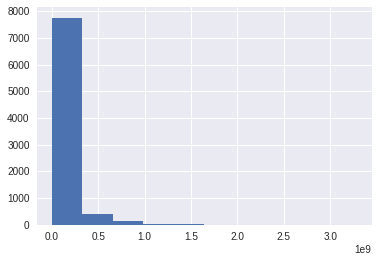

In [366]:
plt.hist(dfMoviesUS['revenue_inflation_adjusted']);

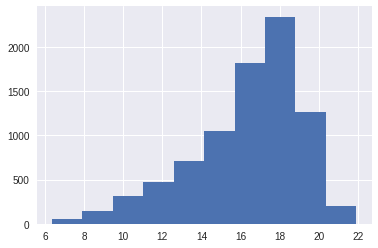

In [367]:
plt.hist(dfMoviesUS['revenue_inflation_adjusted'].map(lambda x: np.log(x)));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


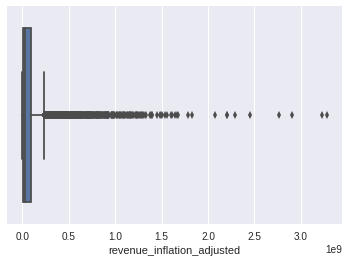

In [373]:
sns.boxplot(dfMoviesUS['revenue_inflation_adjusted']);
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


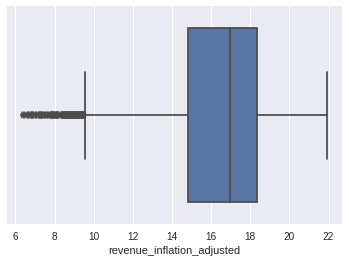

In [374]:
sns.boxplot(dfMoviesUS['revenue_inflation_adjusted'].map(lambda x: np.log(x)));
plt.show()

In [391]:
myFeaturesList[0:5]

['budget_inflation_adjusted',
 'runtime',
 'belongs_to_collection',
 'release_month',
 'intAnnual']

In [386]:
dfMoviesUS['belongs_to_collection'].value_counts()

0    6786
1    1587
Name: belongs_to_collection, dtype: int64

In [382]:
#42 sin info + 1 de una categoría errónea
dfMoviesUS.groupby(myFeaturesList[11:18])['status'].count().reset_index().sort_values(by='status', ascending=False)

,indAnimationMusic,indFantasyScienceFiction,indDocumentaryHistoryWar,indRomance,indComedy,indThrillerHorrorActionCrimeMystery,indDrama,status
2,0,0,0,0,0,1,0,1958
3,0,0,0,0,1,0,0,1603
4,0,0,0,1,0,0,0,1326
6,0,1,0,0,0,0,0,1184
1,0,0,0,0,0,0,1,787
5,0,0,1,0,0,0,0,760
7,1,0,0,0,0,0,0,712
0,0,0,0,0,0,0,0,43


In [0]:
dfMoviesUS['indGenreNull'] = None
dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(auxGenreNullIds), 'indGenreNull'] = 1

In [487]:
auxGenreNullIds = dfMoviesUS[(dfMoviesUS['indAnimationMusic']==0) & (dfMoviesUS['indFantasyScienceFiction']==0) & (dfMoviesUS['indDocumentaryHistoryWar']==0) & (dfMoviesUS['indRomance']==0) & (dfMoviesUS['indComedy']==0) & (dfMoviesUS['indThrillerHorrorActionCrimeMystery']==0) & (dfMoviesUS['indDrama']==0)]['movie_id'].tolist()
len(auxGenreNullIds)

43

In [0]:
updatingList = list()

for column in ['indAnimationMusic', 'indFantasyScienceFiction', 'indDocumentaryHistoryWar', 'indRomance', 'indComedy', 'indDrama']:
    updatingList = updatingList + [round(len(auxGenreNullIds) * dfMoviesUS[dfMoviesUS[column]==1].shape[0] / (dfMoviesUS.shape[0] - len(auxGenreNullIds)))]

updatingList = updatingList + [len(auxGenreNullIds)-sum(updatingList)]
updatingList

In [6]:
np.random.shuffle(prueba)
print(prueba)

[8, 5, 6, 4, 4, 7]


In [0]:
#np.random.seed(100)
#auxInt = 0

#for column in ['indAnimationMusic', 'indFantasyScienceFiction', 'indDocumentaryHistoryWar', 'indRomance', 'indComedy', 'indDrama']:
#    dfMoviesUS.loc[dfMoviesUS['movie_id'].isin(np.random.choice(dfMoviesUS[dfMoviesUS['movie_id'].isin(auxGenreNullIds)]['movie_id'].tolist(), updatingList[auxInt])), column] = 1
#    auxGenreNullIds = dfMoviesUS[(dfMoviesUS['indAnimationMusic']==0) & (dfMoviesUS['indFantasyScienceFiction']==0) & (dfMoviesUS['indDocumentaryHistoryWar']==0) & (dfMoviesUS['indRomance']==0) & (dfMoviesUS['indComedy']==0) & (dfMoviesUS['indThrillerHorrorActionCrimeMystery']==0) & (dfMoviesUS['indDrama']==0)]['movie_id'].tolist()
#    print(len(auxGenreNullIds))
#    auxInt += 1

In [0]:
#dfMoviesUS.loc[dfMoviesUS['indGenreNull'] == 1, ['indAnimationMusic', 'indFantasyScienceFiction', 'indDocumentaryHistoryWar', 'indRomance', 'indComedy', 'indDrama']] = 0

In [535]:
#42 sin info + 1 de una categoría errónea
dfMoviesUS.groupby(myFeaturesList[11:18])['status'].count().reset_index().sort_values(by='status', ascending=False)

,indAnimationMusic,indFantasyScienceFiction,indDocumentaryHistoryWar,indRomance,indComedy,indThrillerHorrorActionCrimeMystery,indDrama,status
2,0,0,0,0,0,1,0,1958
3,0,0,0,0,1,0,0,1603
4,0,0,0,1,0,0,0,1326
6,0,1,0,0,0,0,0,1184
1,0,0,0,0,0,0,1,787
5,0,0,1,0,0,0,0,760
7,1,0,0,0,0,0,0,712
0,0,0,0,0,0,0,0,43


In [387]:
#El idioma siempre estaba completo.
dfMoviesUS['indLang_ENG'].value_counts()

1    7451
0     922
Name: indLang_ENG, dtype: int64

In [388]:
#248 sin info
dfMoviesUS.groupby(dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('indCountries')].tolist())['status'].count().reset_index().sort_values(by='status', ascending=False)

,indCountries_US_only,indCountries_US_and_oth,indCountries_Eur_only,indCountries_Other,status
4,1,0,0,0,5055
3,0,1,0,0,1490
2,0,0,1,0,898
1,0,0,0,1,682
0,0,0,0,0,248


In [389]:
dfMoviesUS.groupby(dfMoviesUS.columns[dfMoviesUS.columns.str.startswith('indCertific')].tolist())['status'].count().reset_index().sort_values(by='status', ascending=False)

,indCertific_G_PG,indCertific_PG13,indCertific_R_NC17,status
1,0,0,1,3348
2,0,1,0,1998
0,0,0,0,1586
3,1,0,0,1441


In [0]:
#DE MOMENTO VOY A EXCLUIR LOS NULOS EN LAS VARIABLES QUE LOS TIENEN (budget y runtime). Y VOY A EXCLUIR LA ÚNICA VARIABLE CATEGÓRICOA (MONTH)
#Y TENGO QUE DECIDIR QUÉ HACER CON LAS PELIS SIN INFO DE GÉNERO NI PAÍS.

In [0]:
X=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][myFeaturesList]
y=dfMoviesUS[(dfMoviesUS['budget_inflation_adjusted'].notnull()) & (dfMoviesUS['runtime'].notnull())][['revenue_inflation_adjusted']].applymap(lambda x: np.log(x))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [0]:
from sklearn.pipeline import make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

In [0]:
def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low']]

def get_log_cols(df):
    return df[['OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))

In [0]:
#Revenue vs variables de actores, excluidos los nulos de budget y 7 outliers, con log. R2 25%.
X=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low', 'OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
y=dfMoviesUS[(dfMoviesUS['budget_final']>0) & (dfMoviesUS['budget_final']<3e8)][['revenue_final']].applymap(lambda x: np.log(x))


#OJO: quité el ".values" porque si no me petaba el pipeline que encadené.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)


from sklearn.pipeline import make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression


def get_not_log_cols(df):
    return df[['3FirstRoles_High', '3FirstRoles_Medium', '3FirstRoles_Low']]

def get_log_cols(df):
    return df[['OtherRoles_High', 'OtherRoles_Medium', 'OtherRoles_Low']]
  
def log_1(df):
    return df.applymap(lambda x: np.log(x+1))
  
  
model_1 = Pipeline(steps=[
    ('union', make_union(
    FunctionTransformer(get_not_log_cols, validate=False), 
    Pipeline(steps=[('get_log_cols', FunctionTransformer(get_log_cols, validate=False)), 
                    ('log_x_plus_1', FunctionTransformer(log_1, validate=False))])
    )), 
    ('linear_regression', LinearRegression())
                   ])   


model_1.fit(X_train,y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
  
import math
math.sqrt(mean_squared_error(y_test,model_1.predict(X_test)))


mean_absolute_percentage_error(y_test,model_1.predict(X_test))


r2_score(y_test,model_1.predict(X_test))


# The coefficients
pd.Series(model_1.named_steps['linear_regression'].coef_[0], index=X.columns)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, model_1.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_1.predict(X_test)))


from sklearn.model_selection import cross_val_score
cross_val_score(model_1, X, y, cv=10)


cross_val_score(model_1, X, y, cv=10).mean()


#¿Por qué ahora no me sale bien?!!!
#plt.hist((np.abs(y_test - model_1.predict(X_test)) / y_test)),bins=100);

In [364]:
dfMoviesUS.shape

(8373, 98)